# Professor Timothy H. Savage, Ph.D. CRE

## NYU Schack Institute of Real Estate

## Faculty Director | CREFC Center for Real Estate Finance at NYU

## Faculty Coordinator | Data Analytics

## Distinguished Fellow | NAIOP Research Foundation

* [Who I am](https://www.sps.nyu.edu/homepage/academics/faculty-directory/20319-timothy-h-savage.html)
    * Clinicial Assistant Professor at the NYU Schack Institute of Real Estate
    * Distinquished Fellow of the NAIOP Research Foundation
    * Former Senior Managing Economist and Principal Data Scientist of CBRE Econometric Advisors
    * Former visiting scholar at the NYU Center for Urban Science & Progress
* What matters
    * Econometrician by training
    * Bayesian by practice, but classical statistician when teaching

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import fix_yahoo_finance
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from IPython.display import Image
import urllib.request as url
import io
import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


# Week 1



## Course Introduction



## Technology
* NYU Classes
* Jupyter Notebooks
* PowerPoint




## My Goals



* To provide a framework to apply finance to CRE investing and development.
* With this framework, you can consider how, for example, COVID-19 may or may not impact cities and, therefore, CRE performance.
* Consider the impact COVID-19 has had on amenities in NYC.




## What Is the difference between finance and economics?
* At its core, economics studies **decision-making** in the face of **budget constraints** and **uncertainty**.
    * What are **budget constraints**?
    * What is **uncertainty**?



* **Finance** is a branch of economics.
    * Finance addresses ideas in **portfolio optimization**.  
    * A **portfolio** is a collection of assets whose returns are potentially correlated (either positively or negatively).  
    * The holder of the portfolio can **buy** or **sell** assets to adjust the portfolio in very small increments **without fees or taxes** and without affecting asset **prices**.
    * The ideas can be applied to CRE, but the underlying market **microstructure** is different.  *Location, location, location*.




# Three Empirical Regularities Relevant for CRE (April 2021)

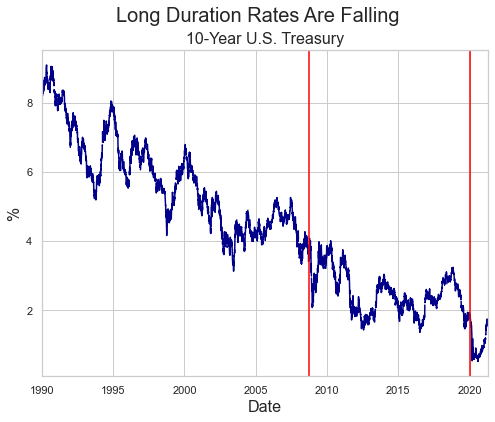

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Are Falling', fontsize=20)
plt.title('10-Year U.S. Treasury', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color="red")

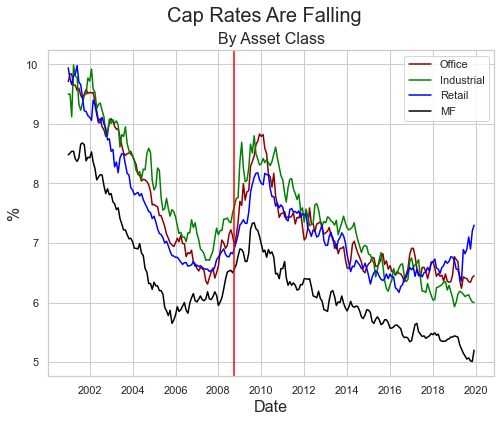

In [3]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

plt.figure(figsize = (8, 6))
plt.suptitle("Cap Rates Are Falling", fontsize=20)
plt.title("By Asset Class", fontsize=16)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 10, 1), color="red")

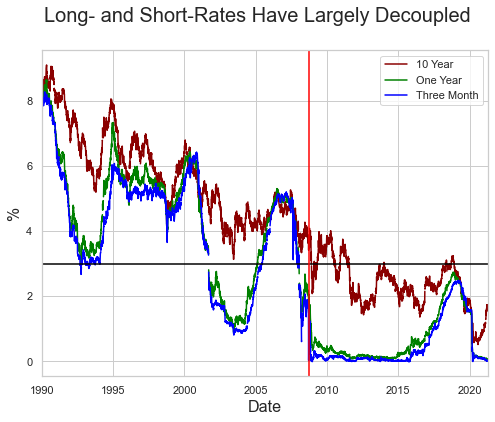

In [4]:
ten_year.plot(c='darkred', label='10 Year', figsize=(8, 6), )
one_year.plot(c='green', label='One Year')
three_month.plot(color='blue', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(3.0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

# Course Overview Slides

# Chapter 1: Real Estate Economics

## Economics
* Demand
* Supply
* Equilibrium
* Comparative dynamics
* The remainder of this course

### The Economics of Supply and Demand
* Supply and demand curves are abstractions (or representations) used to study markets.
* They are unobserved and unobservable (even by economists).
* The theory of revealed preference: we observe what firms and individuals do (faced with constraints and uncertainty).
* Supply = demand is an **equilibrium condition** $\Rightarrow \{P^*, Q^*\}$ as an equilibrium.
* Comparative dynamics examine how **one change** impacts an equilibrium.
* **Never Reason from a Price Change**
    * Why?  Without further exploration, we do not know whether it arose from a demand-curve shift or a supply-curve shift.

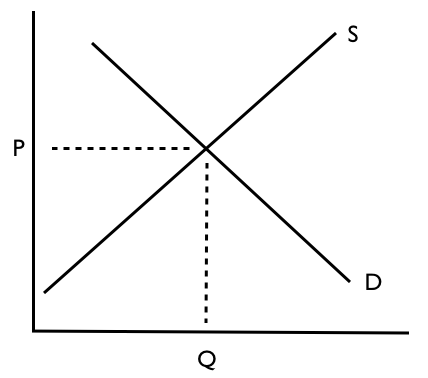

In [5]:
url = 'https://upload.wikimedia.org/wikipedia/commons/4/48/Supply-Demand-Graph.png'
Image(url, width=400, height=400)

## Finance and Its Functions
* A branch of economics that studies financial markets.



* Prices are interest rates or equity prices.
    * Focus is on yields or returns



* Demand is the demand for capital to deploy to its "highest and best use".



* At its core, its function to match time preferences of the supply of capital (savers) and the demand for capital (investors).
    * Many intermediaries: Banks.
    * Banks borrow short and lend long.
    * Banks borrow liquid and lend illiquid.
        * A major source of risk is **simply time**.

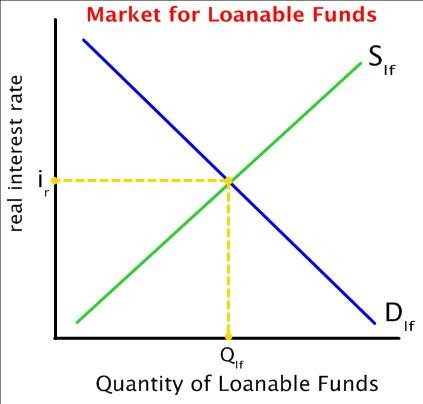

In [6]:
#from IPython.display import Image
url = 'https://sbhshgovapmacro.files.wordpress.com/2011/04/loanable-funds-graph.jpg'
Image(url, width=400, height=400)

## Important Market Distinctions
* Commodity markets (agriculture)



* Equity markets (stocks)



* Debt markets (bonds)



* Space markets (commercial real estate)
    * Owners/landlords 
    * Tenants
    * Brokers as market makers 
        * Traditional ten-year leases and relationship management
    * Capital markets are largely undifferentiated flows of capital (absent, say, government controls)
    * Real estate markets are highly differentiated and are constituted with long-lived assets
        * Returns are rents (income) plus price appreciation (yield)
        * Income is local
        * Yield is global
    * Investor interest in real estate lies in the potential of uncorrelated returns (against some benchmark)
    * Space markets are highly susceptible to technological disruption
        * E-commerce and industrial/retail/multifamily
        * Co-working and office
        * Sharing economy and multifamily
        * Emergence of niche real estate offerings, such as self storage and student housing
        * Consider the *Geltner et al.* textbook: typos with no obvious mechanism to to correct  
            * Contrast with this notebook

## Physical Demand for Real Estate
* Contrast with investor demand for real estate.



* Driven largely by employment growth in the short run.
    * *Torto* and *Wheaton* have shown that near-term performance in rents and vacancy is driven by employment growth.

## Physical Supply of Real Estate
* Physics creates a kinked supply curve. 
    * Time from blue print to construction to pre-leasing to lease up.
    * Space tends to be added rather than deducted from the physical stock.



* Employment growth has no impact on supply **until it does**.
    * Long Run Marginal Cost Curve (LRMC), an approximation to a supply curve.
        * Baseline: Replacement rent sufficient to maintain stock $\Rightarrow$ flat LRMC.
        * Rising: A unit of space becomes **ever more** costly due, for example, to physical constraints or regulation.
        * Falling: Less costly to build due to technological improvement (exogenous) or declining demand for a location (endogenous).  
            * Contrast Midtown with Hudson Yards (in 2019)

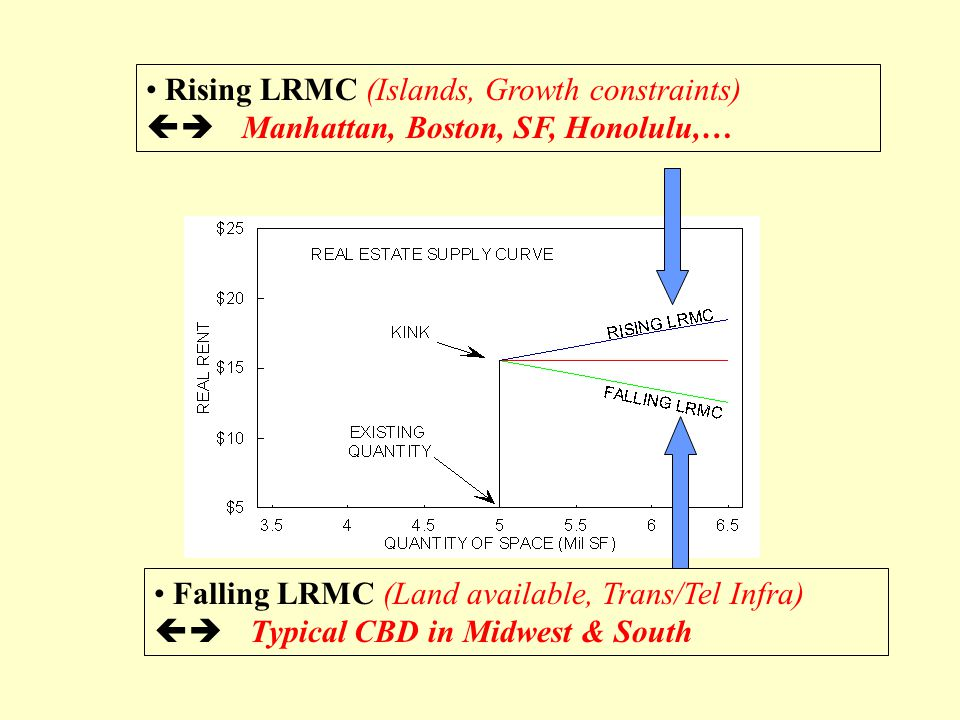

In [7]:
url = 'https://slideplayer.com/slide/5761193/19/images/21/Rising+LRMC+%28Islands%2C+Growth+constraints%29.jpg'
Image(url, width=800, height=800)

## Capital Markets
* Core ideas of capital markets laid out by Walter Bagehot in *Lombard Street*.
    * Borrowing liquid and lending illiquid.
    * Borrowing short and lending long.
    * Essentially, a conversion of time and risk preferences.
    * Presented the notion of the lender of last resort.
        * Lend freely, but at a high rate of interest to organizations or individuals with "good banking securities" (good collateral).




## Capital Markets for CRE
* In CRE, capital markets are global.
    * May be informationally inefficient when compared with **public** bond and equity markets.



* But real estate remains a physical, local and largely immovable asset.



* Purpose of capital markets is to clear capital so that it is put to its highest and best use.



* Many risks associated with borrowing and lending:
    * Construction of real estate remains localized while capital is global.

# Chapter 2: The DiPasquale and Wheaton (DW) Four-Quadrant Model
* To examine the development of physical space (the built environment), we must unify space and asset markets.
    1. Space markets: See Chapter 1.
    2. Capital markets: Capital for development, driven by rents and vacancy, that in turn drive cash flows and NOI.
    3. Local economic and regualatory conditions: If demand is rising, driving up short-term rents and driving down vacancy, there are profitable entry conditions.  **New contruction**.
    4. Forecasting.  A major component in the industry (but increasingly automated and commoditized).

## The DiPasquale and Wheaton (DW) Model: Tying the Components Together
* George Box: "All models are wrong.  Some models are useful."



* Logical abstraction to assist in thinking about how CRE markets behave,



* Representation of the model.
    * Begin with a market that is in equilibrium (or **steady state**).
    * Create an exogenous shock to evaluate the short-run and long-run implications.
    * In economics and finance, this is called **comparative dynamics**.

## Initial Equilibrium in the DW Model
* Characterized by the tuple: $\{R^*, Q^*, C^*, P^*\}$
* In words,
    * Demand is stable (in equilibrium)
    * Supporting rents at $R^*$ and stock at $Q^*$
    * Based on construction of $C^*$
    * Yielding NOI such that $P^*$ obtains

## Exogenous Shock 1: Demand for Physical Space Increases (say, Amazon Comes to Town)
* $D_0 \rightarrow D_1$

### Short-Run Implications

1. Stock is fixed at $Q^*$
2. $D_0 \rightarrow D_1 \Rightarrow R^* \rightarrow R_1 \Rightarrow P^* \rightarrow P_1$

### Long-Run Implications

1. Profitable entry $\Rightarrow C^* \rightarrow C^{**} \Rightarrow Q^* \rightarrow Q^{**}$
2. $R_1 \rightarrow R^{**} \Rightarrow P_1 \rightarrow P^{**}$
3. New equilibrium: $\{R^{**}, Q^{**}, C^{**}, P^{**}\}$

## Exogenous Shock 2: Investor Preferences for Real Estate Increase
* $D_0 \rightarrow D_1$

### Short-Run Implications

1. $D_0 \rightarrow D_1 \Rightarrow P^* \rightarrow P_1$: values rise as more capital chases a fixed supply of stock
2. Given fixed NOI, cap rates fall from "11% to 8%"
    * NB: Obviously 8% cap rates are currently unrealistic in gateway markets worldwide

### Long-Run Implications

1. Constrution boom $\Rightarrow C^* \rightarrow C^{**} \Rightarrow Q^* \rightarrow Q^{**}$
2. Given fixed demand for physical space, $\Rightarrow R^* \rightarrow R^{**}$
3. Resulting in a decline in NOI, $\Rightarrow P_1 \rightarrow P^{**}$
4. New equilibrium: $\{R^{**}, Q^{**}, C^{**}, P^{**}\}$ characterized by:
    * $R^{**} < R^*$ lower rents
    * $Q^{**} > Q^*$ larger stock
    * $C^{**} > C^*$ larger contruction
    * $P^{**} > P^*$ slightly higher implied values (and lower cap rates)

### Discussion
* The DW model provides a logical framework to consider the four components that comprise real estate markets.
    * It is an abstraction from reality.



* Demand for phyical space is local.



* Investor demand is global for assets that are heterogeneous, leveraged and fixed in location.



* It should be noted that the long-run decline in cap rates in gateway markets is consistent with the DW model, which is called an **empirical regularity**.



* Total stock of real estate (other than retail malls) tends not to fall.  Buildings are added through construction, but not demolished.  



* As a result, when demand for space in an area declines, the stock of space does not decline.  Rather, the quality of the existing stock of space declines.  
    * Renovation of space through investment declines.  
    * Consider the stock of office space in Midtown Manhattan as stock in Hudson Yards and Lower Manhattan delivers.  The stock of space in Midtown is not torn down.  It is simply less-well maintained.

# Chapter 7: Real Estate as an Investment

1. Investors
2. Liquidity
3. Debt and equity
4. Real estate: public (REITs) and private (CMBS) markets
5. Total returns are income (NOI) plus growth (price appreciation)

* **Discussion Topic**: Liquidity and Investors.
    * Liquidity in financial markets has risen substantially.
    * Financial products have become more homogeneous, as investors search for yield.
        * 10-year U.S. Treasurys.
        * AAPL or AMZN.



* How might this affect the the attractiveness of the real estate market?
    * The built space remains highly differentiated.
    * Potential for portfolio diversification and uncorrelated returns.
 
 

* **Discussion Topic**: Historical Investment Performance.
    * An entire building may be easier to own directly than an entire corporation.
        * Leverage magnifies gains in real estate more than leverage magnifies gains in the stock market.
    * Typical leverage structure in real estate is a ~75% loan-to-value ratio (LTV).
        * 1MM investment with 750M of leverage and 250M of equity (cash).  
        * A 25% increase in portfolio value to 1.25MM doubles your equity (return as a share of debt).
        * This is a 100% return on equity, but because real estate is illiquid, you may not be able to realize the gain through immediate sale.
    * Consider a similar structure in the stock market.
        * Aggressive *advance rate* of 75%, which is the legal maximum given a minimum-mandated 25% margin.
        * The same 25% increase in the portfolio value increases the equity by only 40% (return as a share of value). 
        * This level of an advanced rate would be available only to the most credit-worthy clients trading in the most liquid markets. 

# Chapter 8: The Time Value of Money

## The Origin and Principle of Risk Aversion

1. **Certainty** is preferred to **uncertainty** (even if the expected payout is the same).
2. Consider a payout of 50 **with certainty** over the gamble of a coin flip.  I win 0 if the coin lands heads and 100 if the coin lands tails.  Given a **fair** coin, the expected outcome is 50.  
3. The same is true about consumption today versus consumption tomorrow.  **Tomorrow may not occur**.
4. The economics **drives** the mathematics of the time value of money.
5. The future is discounted because **it may never occur**.

## Present Value and Future Value

### Standard Equations
* Discounting: $PV = \displaystyle\frac{FV}{1+r}$
    * This basic idea is the foundation of much of the material we will cover.  
    * DCF, IRR, OCC and other measures common in the industry.


* Augmenting: $FV = (1+r)\cdot PV$

### Multiple Periods: Simple versus Compound
* $ \$100\cdot1.15 = \$115$



* $ \$115\cdot1.15 = \$132.25$ 



* $ \$100\cdot1.15\cdot1.15= \$132.25$ or a 32.25% compound return.  
    * Note: 32.25% > 30% (or 15% + 15%)
    * Note: 32.25% / 2 = 16.25% > (30% / 2)



* $ \$100\cdot(1.15)\cdot(1.15) = \$132.25$



* $FV_N = (1+r)^N\cdot PV$



* From this point forward, **the dollar sign will be assumed but not used**.  These formulas apply to all currencies.



* In general, percentages are assumed.  Recall a percentage is **unit free measure**.  100 basis points, often written as **bps**, is one percentage point.  



* Changes in CRE measures, such as vacancy, from quarter to quarter tend to be small, ~ $\pm$10 bps.  

### Solve for r

* $\displaystyle\frac{FV}{PV}=(1+r)^N \Rightarrow r = \displaystyle(\frac{FV}{PV})^\frac{1}{N}-1$

### Solve for N

* $\displaystyle\frac{FV}{PV}=(1+r)^N \Rightarrow N\cdot\ln(1+r)=\ln(\displaystyle\frac{FV}{PV}) \Rightarrow N = \displaystyle\frac{\ln(FV)-\ln(PV)}{\ln(1+r)}$

### Effective Annual Rate

* EAR $=\big(1+\displaystyle\frac{i}{m}\big)^m-1$
* $i$: nominal annual rate
* $m$: number of compound periods
* $\displaystyle\frac{i}{m}=r$: simple interest rate per compounding period

### Solve for i

* $i=m\cdot\big[\big(1+EAR\big)^\frac{1}{m}-1\big]$

### In nominal terms

* $r=\frac{i}{m}$ once per period.
* $N=m\cdot T$, where $m$ is number of compounding events per year and T is the number of years.
* $PV=\displaystyle\frac{FV}{(1+\frac{i}{m})^{mT}}$ or $FV=(1+\frac{i}{m})^{mT}\cdot PV$

### Solve for i and T

* $i=m \cdot \big[\big(\frac{FV}{PV}\big)^{-mT}-1\big]$

* $T=\displaystyle\frac{\ln(FV)-\ln(PV)}{m \cdot \ln(1+\frac{i}{m})}$ assuming $FV \ge PV$

## Expand to the Multiperiod Problem Using Building Blocks

* **Example**: 10,000 received in two years and 12,000 received in three years discounted by 10% and 11% respectively.
* $PV=\frac{10000}{1.10^2}+\frac{12000}{1.11^3}=17038.76$

### Concepts
* **Annuity**: limited life of constant cash flow, such as rents on a 10-year lease.
* **Perpetuity**: infinitely lived cash flows, such UK gilts.  See [this](https://en.wikipedia.org/wiki/Gilt-edged_securities).

### A Simple Proof on the Convergence of Sums 
$S=a \cdot d^0 + a \cdot d^1 + a \cdot d^2 + ... + a \cdot d^{N-1}$ because $d^0 = 1$ for any real $d$



$S \cdot d = a \cdot d^1 + a \cdot d^2 + a \cdot d^3 + ... + a \cdot d^{N}$



* If we subtract $S \cdot d$ from $S$, virtually all terms cancel:



$S-S \cdot d = a-a \cdot d^N = a \cdot (1-d^N)$



* Note that $S-S \cdot d = S \cdot (1-d)$



* Equating the above:
$S \cdot (1-d) = a \cdot (1-d^N) \Rightarrow S = a \cdot \displaystyle \frac{1-d^N}{1-d}$, **which is finite**.



* $d$ is called the common factor.



* Because $d<1$, $\lim_{N \rightarrow \infty}S=a \cdot \displaystyle \frac{1}{1-d}$  
    * This proof may be thousands of years old.



* Therefore, an **infinite sum** is actually **finite**.  Hence, it is possible to value a perpetuity because of this infinite sum is finite.

### Example
* Suppose 240 payments remain on a monthly mortgage with 1,000 payments per month.



* What is the present of the mortgage today if the opportunity cost of capital is 12% per annum or 1% per month?



* $PV=\frac{1000}{1.01^1}+\frac{1000}{1.01^2}+\frac{1000}{1.01^3}+...+\frac{1000}{1.01^{240}}$



* In this set up, 
    * $a=\frac{1000}{1.01}$ and $N=240$ and $d=1.01$
    * $PV = a \cdot \displaystyle \frac{1-d^N}{1-d} = \$90,819$



* Two points:
    - There's a typo in the book on page 163.
    - $1.01^{240} = 10.8925 \Rightarrow$ we are reducing tail-end payments by two orders of magnitude, 1000 / 100 = 10.  (Two orders of magnitude simply means there are two zeros on the 100).
    
    
    
* Rent payments far into the future need to be discounted heavily.

### Example
* Suppose an annuity grows at a constant rate of $g$.



* That is, there is an escalation clause of 2% growth per annum and the lease is quoted in dollars/sqft starting at 20.  



* What is the PV of a 10-year lease?



* $PV=20\cdot\frac{1.02^0}{1.10^1}+20\cdot\frac{1.02^1}{1.10^2}+20\cdot\frac{1.02^2}{1.10^3}+...+20\cdot\frac{1.02^9}{1.10^{10}}$



* In this set up, 
    * $a=\frac{20}{1.10}$, $N=10$ and $d= \frac{1.02}{1.10}$
    * $PV = a \cdot \displaystyle \frac{1-d^N}{1-d} = 132.51$ per sqft
    
    
    
* $PV=CF_1 \cdot \big[\frac{1-(\frac{1+g}{1+r})^N}{r-g} \big]$ assuming $r\gt g$
    * If $g=0$, the old formula obtains

### Example: Consider a Perpetuity with Constant Growth

* 100 units with rent of 1,000 per month and operating expenses of 500.



* Assume at 5% vacancy (or 95% occupancy)



* Rents and expenses grow at the same 3% rate per year or 0.25% per month.  3/12 = 0.25.



* Opportunity cost of capital (OCC) is 12% per year or 1% per month.  12/12 = 1.



* What is the PV?
    * $PV=\frac{CF_1}{r-g}$ or $\frac{NOI}{r-g}$ assuming $r>g$
    * Cash flow is NOI $\cdot$ Units $\cdot$ Occupancy = (1000 - 500) $\cdot$ 100 $\cdot$ 0.95 = 47500
    * $PV = \frac{47500}{1.01} + \frac{1.0025 \cdot 47500}{1.01^2} + ... $



* In this example: 
    * $a=\frac{47500}{1.01}$ and $d= \frac{1.0025}{1.01}$
    * $PV = a \cdot \displaystyle \frac{1}{1-d} = 6333333$

## Summary
* $d=\displaystyle \frac{1}{1+r}$: annuity with no growth


* $d=\displaystyle \frac{1+g}{1+r}$: annuity with growth rate g


* $a=\displaystyle \frac{CF}{1+r}$: end of period


* $a=CF$: beginning of period


* Annuity: $N =$ number of periods


* Perpetuity: $N=\infty \Rightarrow d^N = 0$

## Discounted Cash Flows and IRR
* DCF: Present value of a future stream of income or cash flows.



* PV $= \frac{PMT}{(1+r)^1} + \frac{PMT}{(1+r)^2} + ... + \frac{PMT}{(1+r)^N} + \frac{FV}{(1+r)^N} =$ Stream + Lump Sum



* If cash flows are not well described by equal payments of a level annuity plus a lump sum, consider the use of an IRR or hurdle rate.



* NPV $=\frac{CF_0}{(1+IRR)^0} + \frac{CF_1}{(1+IRR)^1} + \frac{CF_2}{(1+IRR)^2} + ... + \frac{CF_T}{(1+IRR)^T}$ when cash flows differ.  Note the basic structure of the sum of discounting a future stream.



* To solve for IRR, set NPV to zero.  The IRR is the rate that makes it exactly zero.



* If one could borrow at a rate below the IRR, this would be a positive NPV project.



## The Role of Monetary Policy
* Consider the world before the **global financial crisis** and **COVID-19**.



* Monetary policy involved central banks, such as the Federal Reserve (through the **Federal Reserve Open Market Committee**), buying and selling short-term government debt, such as U.S. Treasurys.  



* The mechanism by which these actions affected the real economy was through private investment, in particular residential and commercial real estate.  These are called [transmission mechanisms](https://en.wikipedia.org/wiki/Monetary_transmission_mechanism).
    * Consider the supply and demand for money using the "Market for Loanable Funds" representation above.  
    * How does the FOMC impact the price of money?  
    * By expanding or contracting its supply?



* Post-financial crisis monetary policy involves the purchase of **private debt**, such as mortgages, to affect the long-end of the yield curve. We call this **quantitative easing**.
    * Consider the original [1913 Act](https://www.investopedia.com/terms/f/1913-federal-reserve-act.asp) that created the Federal Reserve system in the U.S.  
    * Does the current Federal Reserve have sufficient tools to conduct monetary policy?  
    * Quantitative easing is an example of a policy that may go beyond the Fed's original mandate.  (See chart below.)
    * What other tools might the Fed have in its quiver?  
        * Average inflation targeting: [AIT](https://www.cnbc.com/2020/08/27/powell-announces-new-fed-approach-to-inflation-that-could-keep-rates-lower-for-longer.html).
        * Nominal GDP targeting: [Scott Sumner](https://www.themoneyillusion.com/category/ngdp-targeting/).
        * Fed creates a market for investors to buy and sell GDP indices: [Roger Farmer](https://www.rogerfarmer.com).
    
    

* In my opinion, the Fed took the wrong path in March 2020 in the face of COVID-19, a natural distaster that created in a [liquidity trap](https://en.wikipedia.org/wiki/Liquidity_trap) similar to the [1906 SF earthquake](https://en.wikipedia.org/wiki/1906_San_Francisco_earthquake).  



* Tools available to the Fed:
    1. OMO and Fed Funds rate.  (Now standard.)
    2. Discount window and lender of last resort.  (Original function.  Now quantitative easing.)
    3. Reserve requirements.  (Never used.  Interest on excess reserves.)

In [8]:
balance = fred.get_series("WALCL", observation_start='2004-01-01') / 1000000
fedfunds = fred.get_series("FEDFUNDS", observation_start='2004-01-01')

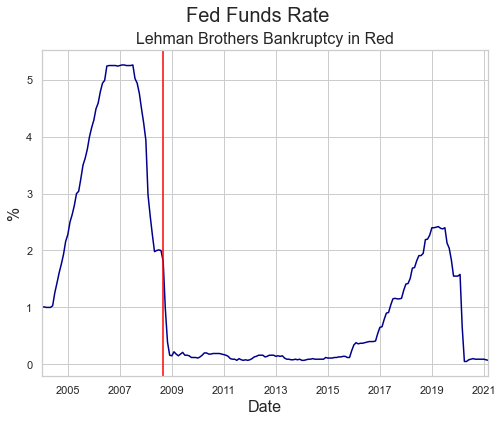

In [9]:
fedfunds.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Fed Funds Rate', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

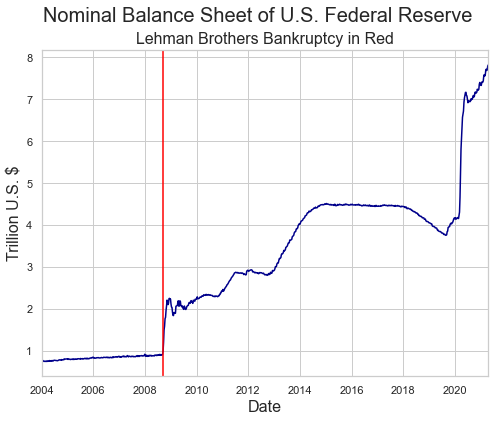

In [10]:
balance.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Nominal Balance Sheet of U.S. Federal Reserve', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillion U.S. $', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

# Chapter 9: Measuring Perfomance

* The future is **inherently unknown**.



* You do not know today whether the stock market is going up or down tomorrow.



* You could guess by, for example, flipping a coin.



* You could build a model to predict stock market returns using machine learning (what I also teach).

### Measuring Returns: Returns Are Performance
* Returns = (What you get when you sell - What it cost to buy) / (What it cost to buy).



* **Ex post**: Looking back using empirical data, such as observed cap rates.



* **Ex ante**: Looking forward using expectations, often using the statistical concept of an average.

### Total Returns
* $r_t = \displaystyle \frac{CF_t + V_t - V_{t-1}}{V_{t-1}}$



* $CF_t$: cash flow.  If CRE, monthly rent.  If a stock, a quarterly dividend.



* $V_t$: value today.  If CRE, property value.  If a stock, the current stock price.



* $V_{t-1}$: value in prior time period (yesterday, last month, last quarter, or last year).



* $r_t = \displaystyle \frac{CF_t}{V_{t-1}} + \big(\frac{V_t}{V_{t-1}} - 1\big) = y_t + g_t =$ current yield (or income) plus capital return (or growth).
    * In CRE, current yield is monthly rent as a share of value and capital return is change in value.



* Therefore, total returns can **always** be decomposed into a **current yield** and **capital return**.
    * A bond has only a yield, making it sensitive to unexpected inflation.  
    * A pure-growth stock has only a capital return, making it sensitive to expected growth.

### Returns and Risk

* Risk aversion: 
    * **Certainty** is always preferred to a **gamble** (or coin flip) even with the same expected outcome.
        * A payout of 50 with **certainty** is prefered to a payout of either 0 or 100 from a random coin flip.
    * As a result, **investors must be compensated to bear risk**.  



* Exhibit 9-1: $A \succ B \succ C$.
    * In words, a risk-averse investor prefers $A$ to $B$ and $A$ to $C$, as well as $B$ to $C$. 
    * In equilibrium, assets $B$ and $C$ would not exist.
    * Remember the Sharpe Ratio.
    


* $E[r_t]=r_{f,t} + E[RP_t]$ $\Leftarrow$ Capital Asset Pricing Model (CAPM) that we will study in portfolio theory.



* Exhibit 9-2: To take on more risk, investors must be compensated with higher **expected** returns.



* Relations:
    * $r=y+g$
    * $r=r_f+RP \Leftarrow \text{CAPM}$
    
    
    
* Basic measures:
    * Sharpe Ratio: $\displaystyle{\frac{\mu}{\sigma}}$, where $\mu$ is *ex ante* return and $\sigma$ is *ex post* risk.
    * It measures return for a unit of risk $\Rightarrow$ higher is better.

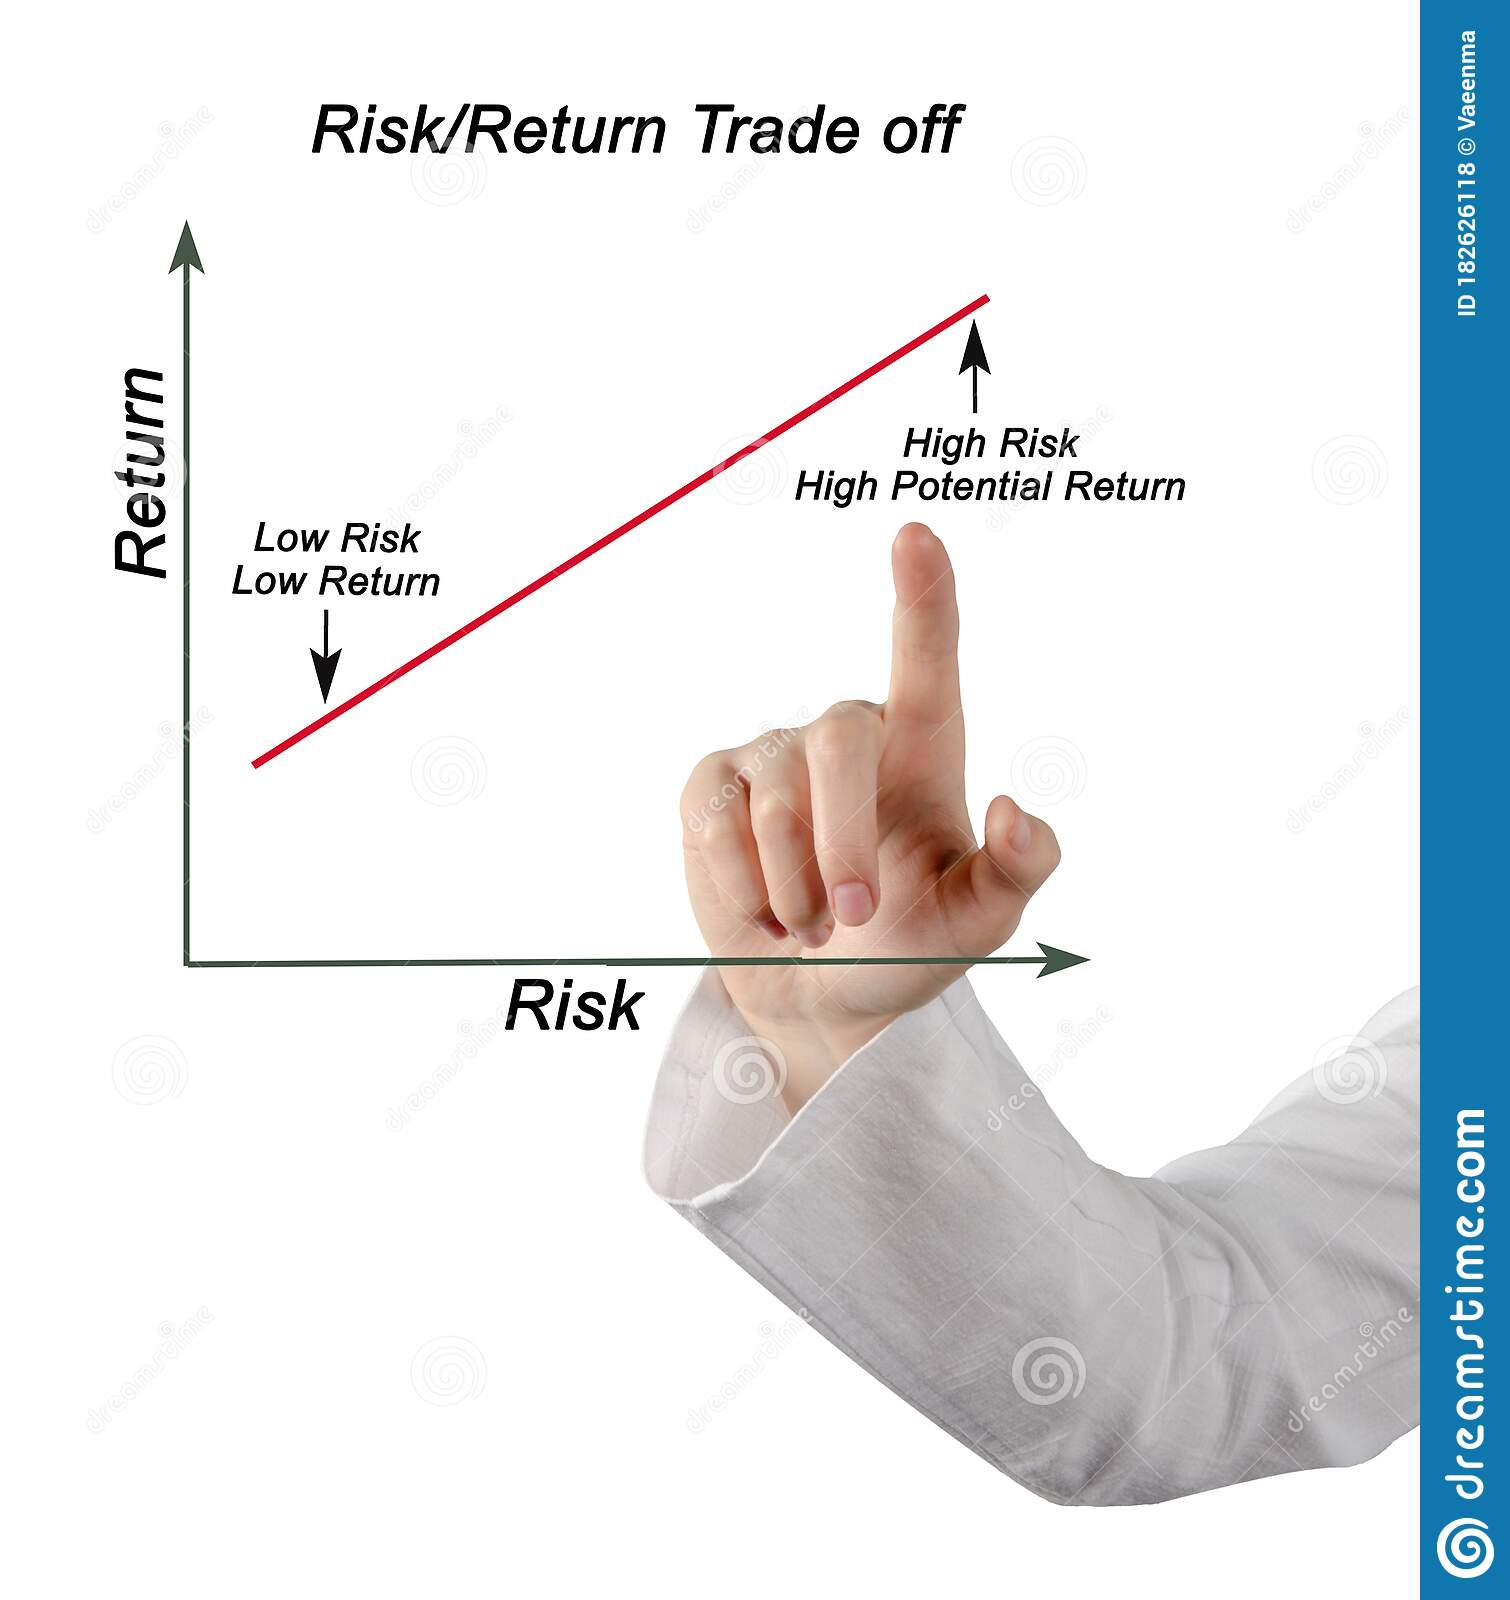

In [11]:
url = 'https://thumbs.dreamstime.com/z/graph-risk-return-trade-off-182626118.jpg'
Image(url, width=400, height=400)

# Chapter 10: DCF and NPV

* What is an financial asset worth?  
    * Finacial assets have no intrinsic value.  **Their value is relative to available alternatives**.  (See [ketchup economics](https://www.investorschronicle.co.uk/2016/04/07/comment/in-praise-of-ketchup-economics-coZWQOc9NiittUVDTztU6J/article.html).)  
    * Their values are determined in a market by **supply and demand**.
    * The **method of DCF** is an approach to valuation.  It is a model but not an algorithm.
    * **Critical point**:  In real estate, cash flows may be independent of the price paid for an asset.
        * Why?  Cash flows are determined by supply and demand in a local market, as well as the prowess and ability of the owner/operator.  
        * Supply and demand in a market over time are largely independent of the price paid for a single asset in that market.   
        * Consider [Hudson Yards](https://www.hudsonyardsnewyork.com) in NYC.  Why might a developer and investor be interested in developing and owning an entire market like Hudson Yards?
        * Now consider the impact of **COVID**, which could not be forecast at the time decisions about Hudson Yards were made.  
    * As a result, prices paid **today** drive expected returns **in the future**.
        * An idea to consider:  [the winner's curse](https://www.investopedia.com/terms/w/winnerscurse.asp).



* Example: 
    * NOI: 10,000
    * End of Period (EOP) Sale Price: 105,000
    * Purchase Price: 100,000
    * Return is (NOI + Change in Value) / Purchase Price
        * (10,000 + 5,000) / 100,000 = 15%



* Suppose instead you paid 105,000
    * (10,000 + 0) / 100,000 = 10%  (The book discounts, but I want to make this an easier example.)

## The Inverse Relation Between Expected Returns and Values
* **Expected returns are inversely related to today’s prices**. 
    * Expected future cash flows (including resale) occur in the future, regardless of how much you pay today for the asset. 
    * They are determined by future economic factors that are independent of how much you pay today for the asset. 
    * **Future rents are determined by future supply and demand in the future**.  
    * Future resale prices are determined by future rents the next buyer expects after acquisition, that buyers’ IRR and their OCC at the time of resale. 
    * None of these factors is influenced by the price you pay today for the property.
    * Uncertainty and the risk-return trade-off.

## Discounted Cash Flow Valuation
* Standard valuation model is the discounted cash flow (DCF).
    * It is a model and **not an algorithm** and consists of three steps:



1. Forecast the expected future cash flows.
2. Ascertain the required total return.
3. Discount future cash flows to present value at the required total return.



* $V$ is present value based on it expected future performance:

$V = \displaystyle{\frac{E_0[CF_1]}{[1+E_0[r]]^1}+\frac{E_0[CF_2]}{[1+E_0[r]]^2}}+...+\frac{E_0[CF_{T-1}]}{[1+E_0[r]]^{T-1}}+\frac{E_0[CF_{T}]}{[1+E_0[r]]^{T}}$



* $CT_t$ are net cash flows (after expenses) in period t, which may be lumpy.



* $𝐸_0[r]$ is expected multi-period return as of time zero (today), which includes the OCC for the investment.



* $T$ is terminal period in the expected holding period, and $CF_T$ would include the net resale value of the property, as well as net cash flows in that period. 



* Value today is inversely related to expected future returns, $E_0[r]$  Why?  This does not sound intuitively correct **but it is**.



* Returns are percentage changes in a value, $\displaystyle{\frac{V_{t+1}-V_t}{V_t}=\frac{\Delta V}{V}}$



* Consider DW: more capital chasing a fixed stock of assets.



* More demand, given a fixed stock, will increase values (or prices) today, $V_t$.



* As a result, *ex ante* returns will decrease, absence changes in $V_{t+1}$,, and future values are determined in the future.



* Consider loanable funds.
    * Given a fixed supply of capital, a decrease in demand decreases the real interest rate, which increases the number NPV positive projects.

## Greater Fool Theory: Always someone more foolish (than you)
* A bemusing idea, but **dated and largely wrong**.  



* Investors have different strategies and risk preferences (but those preferences **cannot be observed**).  



* As a result, investors place different values on the same properties.



* Different valuations imply a potential **gain from trade** (unless transactions costs are too onerous).
    * Recall: this is a basic function of finance: matching the risk preferences (or tolerances) of heterogeneous investors.



* *Someone Smarter Theory*: We can operate this property better than you can.
    * Gains to trade: Consider **BX's acquisition of EOP**.

## The Decomposition of Total Returns
* $r = r_f + RP$: total return is the sum of risk-free rate and risk premium.



* Long-term (10 years) leases with certain payments (monthly rent).  



* Consider this idea in the era of **COVID-19**.

## 10.3: DCF is direct capitalization
* **Short cut**: 
    * $\displaystyle{\text{Value} = \frac{\text{NOI}}{\text{cap rate}} \Rightarrow \text{cap rate}=\frac{\text{NOI}}{\text{Value}}}$
    * Therefore, cap rates are yields: NOI as a share of value if a fully-leased property could be converted to cash immediately.
    * Consider **COVID**: it impacts both NOI and value, so it is not be surprising to see little change in cap rates, especially given **COVID** monetary policy.



* Gross income multiplier for small properties:
    * Given uncertainties in operating expenses.


* Uncertain cash flows must be discounted more heavily to reflect the uncertainty

## The Current Economic Cycle and Its Implications for CRE

In [12]:
yield_curve = fred.get_series("T10Y3M", observation_start='2017-01-01')

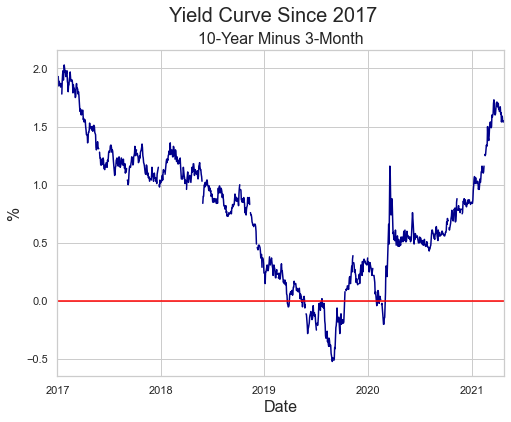

In [13]:
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve Since 2017', fontsize=20)
plt.title('10-Year Minus 3-Month', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="red")

In [14]:
break_even = fred.get_series("T10YIE", observation_start='2017-01-01')

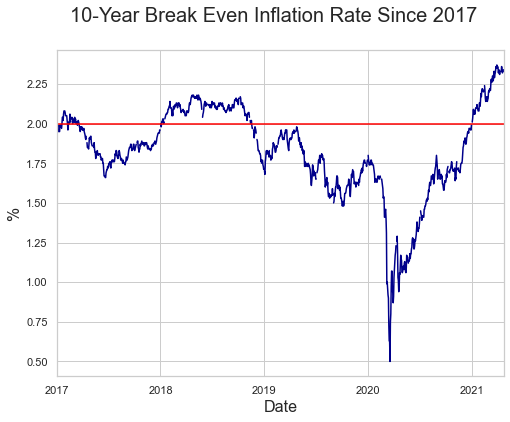

In [15]:
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('10-Year Break Even Inflation Rate Since 2017', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="red")

In [16]:
emp_growth = fred.get_series("PRS85006012", observation_start='1980-01-01')

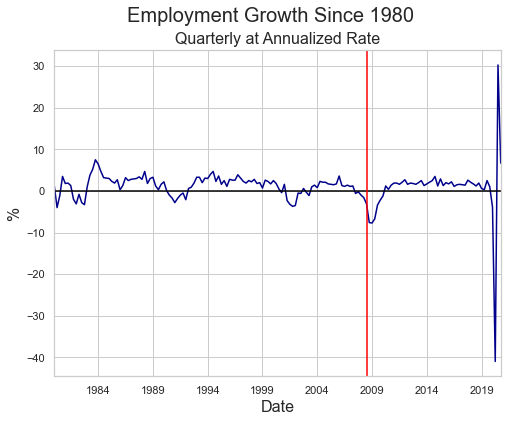

In [17]:
emp_growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Employment Growth Since 1980', fontsize=20)
plt.title('Quarterly at Annualized Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

In [18]:
unemp_rate = fred.get_series("UNRATE", observation_start='1980-01-01')

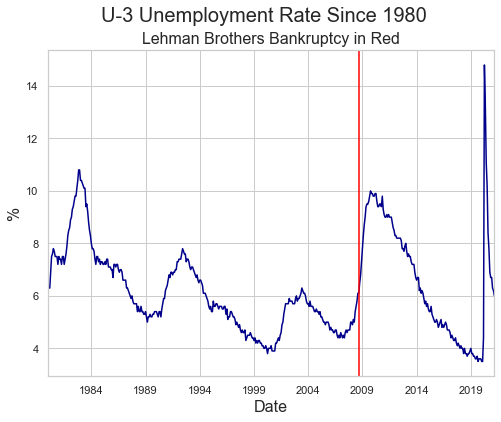

In [19]:
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('U-3 Unemployment Rate Since 1980', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

In [20]:
prime_part = fred.get_series("LNS11300060", observation_start='1980-01-01')

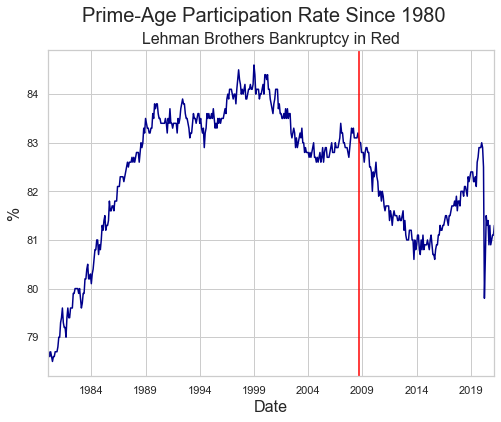

In [21]:
prime_part.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Prime-Age Participation Rate Since 1980', fontsize=20)
plt.title('Lehman Brothers Bankruptcy in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

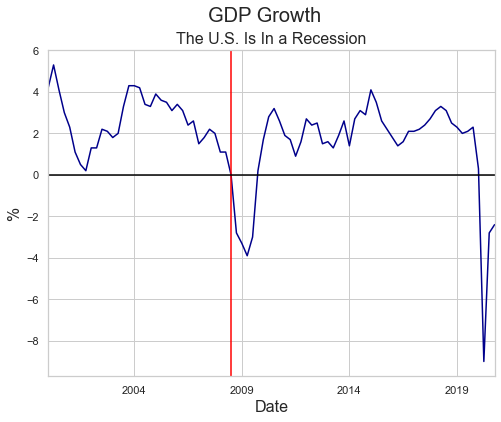

In [22]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='2000-01-01')
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('GDP Growth', fontsize=20)
plt.title('The U.S. Is In a Recession', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axhline(0, color='black')

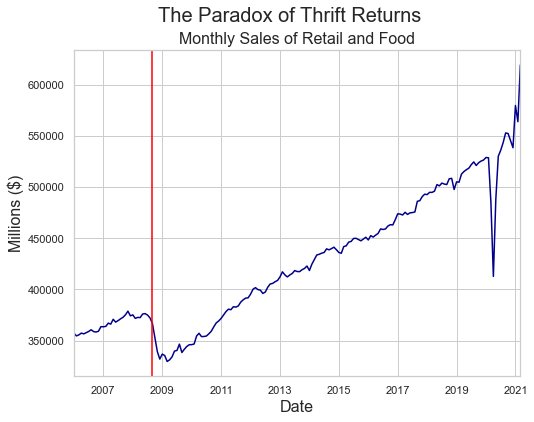

In [23]:
sales = fred.get_series("RSAFS", observation_start='2006-01-01')
sales.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('The Paradox of Thrift Returns', fontsize=20)
plt.title('Monthly Sales of Retail and Food', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

## 10-A
* Real estate is a long-lived asset that investors hold for extended periods of time (five to seven to ten years).



* Transactions costs can be substantial.



* Earning returns through the successful operation of properties increases growth paths of rents and lowers periods of vacancy.



* Performance attribution.
    1.  Initial cash-flow yield (IY)
    2.  Subsequent cash-flow changed (CFC)
    3.  Yield or valuation change (YC)

# Chapter 11: Valuation

* Pro forma (or income) statements are intuitive.
    * See PPT slides.



* Components of the pro forma, however, can involve large expenses (capital improvements) that are depreciated (or amoortized) over time.  
    * In other words, they are one-time, lump-sum expenses.
    * The benefits of which are realized over time rather than at a point in time.
    



* Exhibit 11-2: Inflation has exceeded NOI growth for an extended period of time in the U.S.
    * This period of time includes periods of high inflation and low inflation.
    * Is CRE a hedge against inflation?
        * Not according to [Bill Wheaton](https://www.cbre-ea.com/publications/deconstructing-cre-post/deconstructing-cre/2017/07/21/has-real-estate-been-a-good-hedge-against-inflation-will-it-be-in-the-future)
            * Retail can adapt most rapidly to current economic conditions (in both directions).
            * Office, by construct, is the least adaptable, but because of co-working a substantial share of it will have real-time pricing.




* Exhibit 11-5:  Using "T-Bills" as the risk free rate, $r_f$, we can calculate the return premium, $RP$.
    * Consider real estate: higher $RP$ than long-dated bonds but lower than a broad measure of stocks.
    * Lower volatility than both.
    * Recall that Sharpe ratio measures the ratio of a unit of return $\mu$ to a unit of risk $\sigma$, calculated as $\displaystyle{\frac{\mu}{\sigma}}$.  
        * Compare the the Sharpe ratios across these asset classes, but remember real estate is **illiquid** and its higher Sharpe ratio may capture the illiquidity risk. 

# Chapter 30: Leases and Co-Working (Now Called Agile Workspace)

* See Chapter Slides.



* Consider the idea that the lease is a legal document but has elements that assist transactions to clear because both parties are better off than in the absence of a transaction.



* Agile workspace has **option value**, especially in a pandemic.
    * But can tenants and landlords **get to yes**?

# Real Estate Finance: Themes to Date
* Economics and finance drive the mathematics.



* Economics and finance allow us to think logically about how markets might perform.
    * Excel is tool.
    * Like death and taxes, it will always be with us.
    * But there are better and free tools available to do advanced modeling.
    * One might want to stress test a portfolio using Monte Carlo simulation.
    * One might want to backtest an investment strategy.
    * One might want to simulate potential performance using open sourced data.  (See Savage, Vo, and Zhao.)
    * The future lies with open source tools, such as R and Python.




### We discount the future because it may not occur.




### We recognize that there is a trade-off between *ex ante* return and risk, and *ex post* we may lose money.
#### We are able to apply all of these themes to commercial real estate, as in Chapters 21 and 22.



### Capital is global, but real estate markets are local.



### Real estate markets have complex contracts that we call leases, governing the responsibilities of all parties (landlord, tenant and their representatives).



### Real estate assets are highly heterogeneous and illiquid.
#### They provide potential yield (cash flows) and growth (price appreciation) that may be uncorrelated with equities and bonds.



### An Introduction to Macroeconomics
* *Microeconomics*: the study of individual markets.
* *Macroeconomics*: the study of aggregate output, its fluctuations and their drivers.
* *Econometrics*: the use of statistical models to examine conjectures that arise from theory.



* We have touched on elements of each of these (and will continue to do so in your upcoming courses).
    * Microeconomics: DiPasquale-Wheaton
    * Macroeconomics: interest rate determination (via loanable funds market) and themes in finance
    * Econometrics (now data analytics more generally): modern portfolio theory and 3135
    * *I personally see no difference in any of these topics*
    
    

* The U.S. Federal Reserve was created by a 1913 Act following a large financial crisis and recession in 1907.  It is technically the banker's bank.  
    * Originally, it used the standard tool of the discount window to lend to banks under the gold standard of convertability.
    * In 1933, the gold standard was suspended.
    * During WWII, the Fed began explicit interest rate setting.
    * It was made operationally independent of the U.S. Treasury in the early 1950's under admendments to 1913 Act.
    * The role of the discount window substantially diminished, as did change the reserve ratio.  Primary focus was on OMOs.
    * **Not transparent**.  No explicit statements about overnight Fed Fund rate.  No forward guidance.  No regular testimony to Congress.
    * During the GFC, new tools were needed.  Transparency itself was seen as a tool.  

# Chapter 21: Real Estate and Portfolio Theory

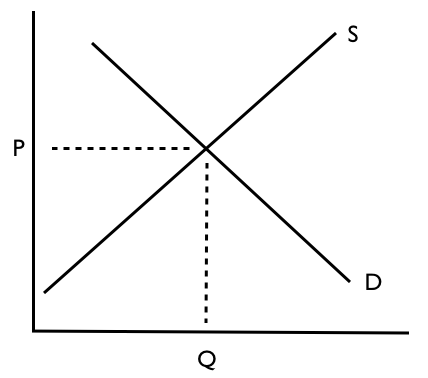

In [24]:
url = 'https://upload.wikimedia.org/wikipedia/commons/4/48/Supply-Demand-Graph.png'
Image(url, width=400, height=400)

## Whence Demand and Supply Curves as They Determine Prices in Equilbirum?



* Demand: Consumers maximimzing utility of consumption, $U(c_1,c_2)$, subject to their income but faced with uncertainty (and generally risk averse).
    * Income falls, generally consume less **of everything**: Keynes' paradox of thrift.
    * If the price of $c_1$ changes, offsetting income and substitution effects.



* Supply: Firms maximizing profits, $\pi=R(q) - C(q)$, subject to considering how their competitors act and uncertainty.
    * Lots of really interesting ideas here from Industrial Organization economists studying competition in markets.
    * Horizontal integration: CBRE and C&W seek to merge.
    * Vertifical intergration (REITs).

## Two Key Ideas: A Return and an Average



### A Return
* (What I earned) / (What I paid) $-1$.



* Consider the idea of a return on a dividend-paying equity: $r_{t+1} = \displaystyle{\frac{p_{t+1} + d_t}{p_t}-1} = \frac{p_{t+1}-p_t}{p_t}+\frac{d_t}{p_t} = $ **capital gain** + **yield**.
    * Setting aside expectations of the future, returns can be decomposed into a **capital gain** and a **yield**.
    * In CRE, the gain is an increase in the value of a building, while the yield is monthly rent (as a share of total value).



### An Average
* $\displaystyle{\frac{1+2}{2}=\frac{1}{2} \cdot 1+ \frac {1}{2} \cdot2=1.5}$.



* $\displaystyle{w_1 \cdot 1+ w_2 \cdot2=}$ ? where $w_1+w_2=1$ or $w_2=1-w_1$.
    * An average is weighted sum.
    * Suppose we can can vary $w_1$ by an infinitesimal amount.
    * This is core idea behind portfolio: costlessly alter assets in a portfolio.




### The Goal
* The goal of this chapter is to relate real estate to the broader ideas in **modern portfolio theory (MPT)**, in which stocks, bonds, and cash are asset types.
    * Each asset type has a return.
    * The returns are correlated.



* Investors, whether individuals or institutional entities, construct portfolios of assets that include stocks, bonds, cash and real estate.  



* It lies at the heart of portfolio optimization that won Harry Markowitz a Nobel Prize in Economics in 1990.   
    * It was developed largely to examine stocks (equities), but its application has expanded far beyond this asset class.  
    * As part of the broader undertaking of portfolio optimization, it is used to explain most core concepts in equilibrium asset pricing.
    * Asset Classes:
        * Cash
        * Bonds
        * Stocks (or equities)
        * Real Estate (a differentiated asset type)



### Portfolios
* Consider a portfolio, $P$, with $n$ assets, indexed as $_i$.  



* Total return on the portfolio is $r_p$, where $E[r_p] = \sum_i w_i \cdot E[r_i] \ni \sum w_i = 1$
    * In words, the expected total return on the portfolio is simply a weighted sum of the expected returns of the individual assets.
        * Long position: $w_i > 0$
        * Short position: $w_i < 0$
        * We will focus on situations where $w_i > 0$



* Total risk is $\sqrt{Var[r_p]}$, which depends on the correlation patterns among the assets in the portfolio.



* Problem statement (or use case): Minimize risk subject to achieving a stated level of return.
    * Risk is backward looking.  It is the *ex post* measure of the standard deviation of returns on the assets in a portfolio.
    * Returns are forward looking.  They are the *ex ante* or expected returns on the assets in a portfolio.
        * Expected returns are weighted averages of the return on the assets in the portfolio.



* Indifference curves and portfolio dominance.
    * See slides.
    * Remember the basic principle:
        * I am better off if I can reduce risk at the same level of return.
        * I am better off if I can increase return at the same level of risk.
        * I am better off if I can combine the two in some manner through diversification.



* Portfolio diversification is a *correlation game* based on correlation patterns in a portfolio.



### Slide 19: Convexity
* [A convex space](https://en.wikipedia.org/wiki/Convex_set): Never cross the boundary.



* Consider the returns on two assets is some portfolio, $P$: $r_1$ and $r_2$ and their associated weights, $w_1$ and $w_2$.
    * $r_P = w_1 \cdot r_1 + w_2 \cdot r_2$
    * $w_1 + w_2 = 1 \rightarrow w_2 = 1 - w_1 \rightarrow r_P = w_1 \cdot r_1 + (1 - w_1) \cdot r_2$
    * Consider the idea of varying $w_1$ continuously from 1 to 0.  
    * Such variation creates the convex space: when $w_1 =1 $, $r_1$ dominates and when $w_1 = 0$, $r_2$ dominates.
    * Trivial to extend to multiple assets, whose returns are indexed by $r_i$ with weights $w_i$.
        * $E[r_p] = \sum_i w_i \cdot E[r_i] \ni \sum w_i = 1$



* Companies mentioned in this lecture:
    * [Commodities Corporation](https://en.wikipedia.org/wiki/Commodities_Corporation)
    * [Long Term Capital Management (LTCM)](https://en.wikipedia.org/wiki/Long-Term_Capital_Management)

## A Correlation Game
* Suppose there is portfolio, $P$, such that each asset in the portfolio has an equal weight, and there are $n$ assets $\Rightarrow w_i = 1/n$ $\forall i$.



* Certainty: Variance does not matter.



* Uncertainty: Variance does matter.



* Uncertainty with a portfolio, $P$: Only covariance matters.  



* Therefore, diversification is a covariance (or correlation) game.



#### Simple Proof (Triangle Inequality)
* Let the risk of portfolio, $P$, be denoted by $\sigma^2_p$.


* $\displaystyle{\sigma^2_p = \sum_{i, j} w_i w_j c_{ij} = \sum_i w^2_i \sigma^2_i + \sum_{i \ne j} w_i w_j \sigma_{ij} \le n^{-2} T + n^{-2} \sum_{i \ne j}c_{ij} = n^{-2} T + (1-n^{-1}) c}$ for some trivial threshold $T$ if we assume:
    * Assume $c_{ij} = c$ where $c_{ij}$ is the covariance of returns between assets $i$ and $j$, and $w_i = 1/n$ $\forall i$


* What happens as the number of assets becomes infinitely large and our ability to invest in infinitely small amounts of them:
    * $\displaystyle{\lim_{n \rightarrow \infty} \{n^{-2} T + (1-n^{-1}) c\} = c}$


* **Diversification is a covariance game**, $c$.


* We like measures that lie between $[-1, 1]$ that we call correlations, $\Rightarrow$ diversification is a correlation game. 

# Chapter 22: Equilibrium Asset Pricing
* The goal of this chapter is to describe the idea of asset pricing (or value) that would obtain in equilibrium.



* The practical uses for asset price theory are:
    1. Tactical: identify mispriced assets
    2. Strategic: identify risk factors 
    3. Benchmarking: identify a standard against which to measure portfolio performance



* **Exhibit 22-2**: The importance of cap rates (rather than cash flows).




## The Capital Asset Pricing Model (CAPM): A Statistical Application of MPT
* Let $r_i$ denote the rate of return to asset $i$, $r_f$ denote the known rate of return on a risk-free asset (for example, short-term US government debt), and $r_m$ denote the rate of return to a portfolio (or a market) that includes $i$.  



* The following equation can be derived:
    * $E(r_i)-r_f = \alpha + \beta \cdot (E(r_{Mi})-r_f)$



* Here, $E(\cdot)$ denotes an expected value (because this is a forward-looking prediction).  


* $\beta$ captures the sensitivity of an asset’s returns to the returns to a portfolio or to the market on which an asset trades.  
    * In other words, it **non-diversifiable risk**.  
    
    
    
* $\alpha$ measures an asset $i$’s **excess (or abnormal) returns**.



* Phrases you may have heard: 

    1. The stock's beta is high
    2. The hedge fund is chasing alpha
    


* In informationally-efficient markets, $\alpha \rightarrow 0$ and $\beta \rightarrow 1$.




## Isn't CAPM Wrong?
> "All models are wrong, but some models are useful."  *George Box*



> "We could always flip a coin, but we don't." *Tim Savage*




## Examples
* Markowitz's other key insight: $E(r_i)-r_f = \alpha + \beta \cdot (E(r_{Mi})-r_f)$ is a statistical application:
    * $r_i = \alpha + \beta \cdot r_{Mi} + \epsilon_i$, where $\alpha$ is the intercept and $\beta$ is the slope.
    
    

* See [CAPM Notebook](https://github.com/thsavage/CREF1-CE1000/blob/main/CREF1%20CE%201000%20Notebook.ipynb)

# Chapter 13: The Effect of Leverage

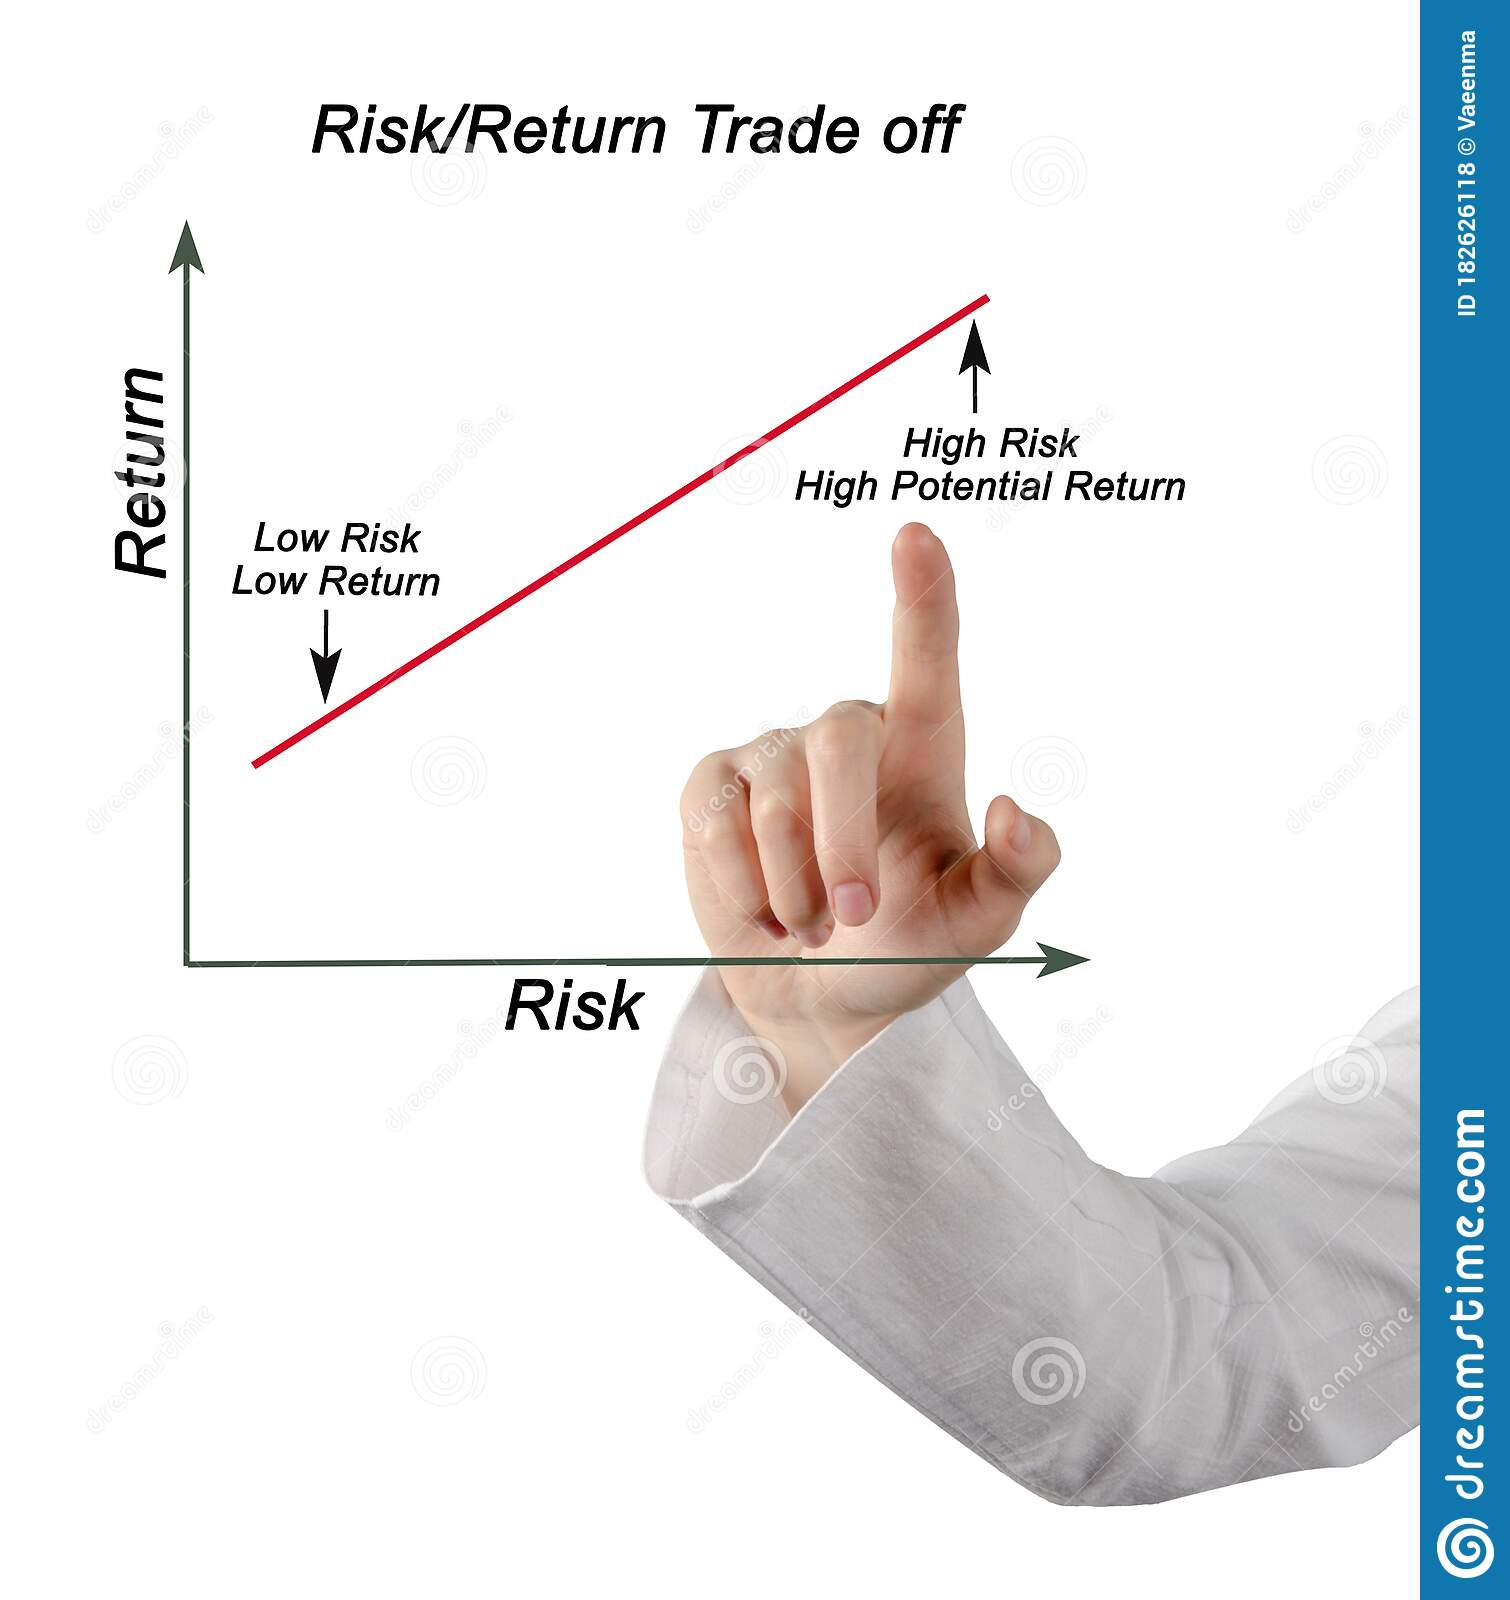

In [25]:
url = 'https://thumbs.dreamstime.com/z/graph-risk-return-trade-off-182626118.jpg'
Image(url, width=400, height=400)

## Overview: The Role of Debt and Leverage
1. Debt creates leverage.
2. Leverage creates risk.
3. The role of finance is to create markets that match risk and return.
4. CAPM provides a framework to consider return given risk.



* Consider our basic representation of the risk-return trade-off, shown above.



* We want to measure risk in a different manner using the idea of debt and leverage.



* To do so, we define a **Leverage Ratio** as:
    * $LR = V / E = (L + E) / E$, where $V$ is an a real estate asset value, $L$ is the loan value of the debt used to acquire the asset, and $E$ is the equity (or cash) used to acquire the asset.



* A standard measure used in the industry is the *Loan to Value (LTV) Ratio*: $L / V$



* $E$, equity, is by defintion the difference between an asset's value and the loan amount used to acquire it
    * $E = V - L$



* $\Rightarrow LR = V / E = V / (V - L) = 1 / (1 - L/V)$
    * Example: $LTV = 0 \rightarrow L = 0 \rightarrow LR = E/E = 1$
    * Example: $LTV = 0.6 \rightarrow LR = 1/(1-0.6) = 1/0.4 = 2.5$
    * Example: $LTV = 0.75 \rightarrow LR = 1/(1-0.75) = 4$
        * A ten billion dollar equity fund using an average LTV of 75% has 40 billion dollars of leveraged equity to deploy.



* As a result, $LR$ and $LTV$ are **positively related**.

## Exhibit 13-2



### Unlevered: LR = 1 or LTV = 0
* Growth: $10,000,000 \cdot 1.02 = 10,200,000$



* Cash Flow: $800,000$



* Income Return: $800,000 / 10,000,000 = 8$%



* Appreciation Return: $10,200,000 / 10,000,000 = 2$%



* Total Return = Income Return + Appreciation Return $=10$%

### Levered Equity and Debt: IO loan at 8% and LR = 2.5 or LTV = 60%
* $6,000,000$ is debt



* IO debt service is $0.08 \cdot 6,000,000 = 480,000$ 



* $800,000 - 480,000 = 320,000$



* $4,200,000 = 10,200,000 - 6,000,000$



* Income Return: $320,000 / 4,000,000 = 8$%



* Appreciation Return: $4,200,000/4,000,000 = 5$%



* Total Return = Income Return + Appreciation Return



* Substantial leverage (or debt) 
    * 13%>10% because interest rate and expenses are lower than expected return, 8%<10%

### Larger Ex Ante Equity Returns Imply Greater Risk
* Sensitivity Analyses: **Optimistic and Pessimistic**



* **Optimistic**: Stronger Cash Flows (income) and Appreciation (growth)



* **Pessimistic**: Weaker Cash Flows (income) and Appreciation (growth)



* Drivers?
    * Macroeconomics (strong employment growth)
    * Microeconomics (Amazon comes to town or doesn't)



* Currently, sophisticated analysis involves not two **discrete scenarios**, but Monte Carlo simulation over a large number of possible outcomes.
    * Currently, this cannot be done in Excel.  
    * But a cloud-based version of Excel may become an indispensible tool once more.  **Go for it, MicroSoft**.

### Risk and Return
* We have already seen this chart that displays the trade off between risk and return.
    * Security Market Line (SML), a basic building block of finance.



* It can be used to show that as more risk is taken on through debt.
    * Risk free (RF) rate of 8%
    * Leverage Ratio (LR): $1 \rightarrow 2.5$
    * Risk Premium (RP): $2 \rightarrow 5$



* Debt becomes more risky if the RF falls: $8 \rightarrow 6$.
    * Why? Opportunity cost of capital has fallen.

### Weighted Cost of Capital (WACC)
* Weighted average (or convex combination) of:
    * Debt and equity returns
    * Weighted by the Loan-to-Value (LTV) ratio

### Key Concepts in this Chapter
* **Exhibit 13-4** and **Exhibit 13-5**
    * Leverage with the use of debt pushes through equity constraints to create (in an ideal world) positive leverage.
    * Higher total return from higher risk premium.
    * **The process works well in a world of declining opportunity costs of capital**.

# Chapter 15: Capital Structure

### Important Ideas
* Debt can be used to break through a capital constraint on a real estate investment that cannot be funded solely through equity (cash).
    * Allows positive NPV projects to be undertaken.
    * Allows for portfolio diversification.
    * Allows for leverage of *human capital* as a type of equity, for which there may be scale: if we measure human capital in dollars, the debt scales this human capital in the same way it scales the equity.
    * Sophisticated investors may take two roles: limited or passive and entrepreurial or active, facilitated by both debt and equity.



* When thinking about real estate finance, the traditional approach has been to consider similar to debt instruments.
    * Pricing is similar to the pricing of bonds with coupons.
    * Leases are the bond.  Rents are the coupon payments.



* As capital markets have expanded, sophisticated tranching structures have emerged involving passive and active partners with the used of *mezzanine debt*.
    * **Exhibit 15-3**: An illustrative example of two types of partners, a passive and an active partner.  
    * There are rules that govern how the cash flows are divided between the two partners, described as a *waterfall*.
        * Cash flows arise from both income and recursion sale.
    * This is a hypothetical example, and given current sophistication, **no two deals or waterfalls look alike**.  This implies that each deal must be analyzed on its own.
    * Oddly, this hypothetical example indicates that the passive partner is **better off** (higher return for level of risk) than the **active partner** (lower return for level of risk).  In equilibrium, this arrangment should not exist.  
    * This example may represent a *starting point* for negotiations between the passive and active partner.



* These tranching structures have **blurred the distinction** between debt and equity.

# Chapter 16: Mortgage Basics I

* The vechicle use to facilitate real estate borrowing (debt) is the real estate [*mortgage*](https://en.wikipedia.org/wiki/Mortgage_loan), legal French for **death pledge**.



* Mortgages are originated in primary markets using the physical property as collateral.
    * Large pools of mortgage may be sold (or securitized) in secondary mortage markets.  The investment products created are called mortgage-backed securities (MBS).  They too have a waterfall structure to be discussed later.



* The mortgage is an example of a *closed system* involving the transfer of a deed and the transfer of money.



* If the borrower defaults or fails to repay the loan, there is *pecking order* established in the mortgage document.



* There are covenants governing the responsibilities of the parties (borrower and lender).
    * Promise to pay (basic principle)
    * Joint and several liability (collective punishment on the borrowers to avoid agency issues and moral hazard)
    * Lender in possession (lender can claim the property as collateral in the event of default)



* Default may result in a formal legal proceeding if the borrower files for Chapter 11 bankruptcy.
    * The principle of borrower limited liability prevents lenders from claiming personal wealth of the borrower.
    * While this principle may give rise to moral hazard and create the possibility of strategic default, it also ensures an entrepreneur is not entirely wiped out.
        > "There are no second acts in American lives."  *F. Scott Fitzgerald*
        
        

* Entrepreneurs take risks, and many ideas fail the first time they are attempted.  (Pets.com becomes Amazon.com.)  Entrepreneurs may learn from their mistakes and improve the likelihood of success in their second act.  Limited liability reflects this idea, even if it creates moral hazard.



* **Exhibit 16-7**: Limited liability creates a put option on the value of default.

In [26]:
mortgage_debt = fred.get_series("MDOTHIOH", observation_start='1980-01-01') / 1000

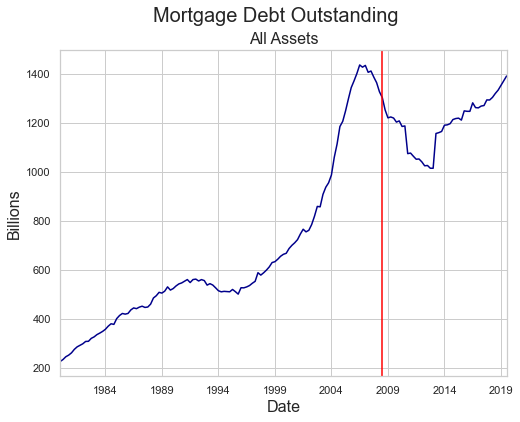

In [27]:
mortgage_debt.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Mortgage Debt Outstanding', fontsize=20)
plt.title('All Assets', fontsize = 16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Billions', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

# Chapter 17: Mortgage Basics II

## Accounting Rules
1. The interest owed in each payment equals the applicable interest rate times the outstanding principal balance (or outstanding loan balance/OLB) at the end of the prior period.  
    * INT$_t$ = OLB$_{t-1}\cdot$ r$_t$



2. The principal amortized (paid down) in each payment equals the total payment (net of expenses) minus the interest owed. 
    * AMORT$_t$ = PMT$_t$ - INT$_t$
    


3. The outstanding principal balance after each payment equals the previous outstanding principal balance minus the principal paid down.
    * OLB$_t$ = OBL$_{t-1}$ - AMORT$_t$
    


4. The initial outstanding principal balance equals the initial contract principal specified in the loan agreement.
    * OLB$_0$ = L

Where:
* L is loan amount



* $t$ indexes period



* $r_t$ is simple rate



* INT is interest owed in period



* AMORT is principal paid down



* OLB is outstanding loan balance



* PMT is payment    

## Computing Mortgage Yields
* As an example consider a 1,000,000, 30-year CPM with an 8% annual interest rate and monthly loan payments of 7,337.65.  
    * The IRR of this loan (computed as a simple monthly rate) is found by solving the following equation for r.



$\displaystyle{0 = -1000000 + \sum_{n=0}^{360}\frac{7337.65}{(1+r)^n}}$



* The answer is r = 0.667%, which equates to the nominal annual rate of 8.00%, calculated as $i = r \cdot m = 0.667 \cdot 12 = 8$.  In this case, the YTM or yield of the loan is identical to its contract interest rate.

* The yield on a mortgage will not always equal its interest rate. Suppose the previous 1MM loan had a 1% origination fee. This means that the lender charges the borrower 1% of the loan amount up front, just to grant the loan.



$\displaystyle{0 = -990000 + \sum_{n=0}^{360}\frac{7337.65}{(1+r)^n}}$



* The answer is r = 0.6755% or a nominal annual rate of 8.11%. The effect of the origination fee is to increase the mortgage YTM by 11 basis points (or 0.11 percent) over the stated contract interest rate in the loan.

* Another way in which the YTM of a loan can differ from its contract interest rate is through the effect of the mortgage market on the value of the loan. 
    * Suppose the originator of this mortgage locked in the terms of this loan a month before the closing of the loan transaction.  
    * Suppose that during that month yields dropped in the mortgage market.  In turn, the loan originator has an offer to sell this mortgage as soon as it closes for a value of 1,025,000. 



* The buyer of the loan is in effect, offering to pay more for the loan than its current contractual outstanding balance (1MM) or par value.  
    * As a result, the mortgage market has caused the market value of the loan to differ from its par value.  
    * The loan originator can make an immediate profit of 25,000 (or 35,000 if we include the 1% origination fee).  The buyer of the mortgage is, in effect, offering to make an investment in this mortgage with a YTM of 7.74% found by solving the below and multiplying by 12.



$\displaystyle{0 = -1025000 + \sum_{n=0}^{360}\frac{7337.65}{(1+r)^n}}$

## The Refinancing Decision: Interest Rates as OCC

In [28]:
ten_year = fred.get_series("DGS10", observation_start='1970-01-01')

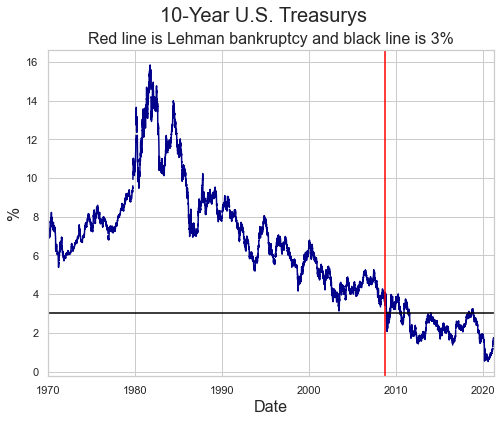

In [29]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('10-Year U.S. Treasurys', fontsize=20)
plt.title('Red line is Lehman bankruptcy and black line is 3%', fontsize = 16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(y=3.0, c="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

# Chapter 18: Mortgage Analysis and Underwriting

* We have discussed the **legal ramifications of default**.
    * Forebearance
    * Workouts
    * Bankruptcy
    * Pecking order



* We want to analyze the risk of default from the perspective of the lender, which is the function of *underwriting*.



### In finance, we make a critical distinction (per Frank Knight):
* Risk, which is quantifiable.



* Uncertainty, which is not quantifiable.
    * The big data revolution shrinks the uncertainty space as we have better measurements in real estate.
    


* Remember that total returns can be decomposed as a sum of yield and growth: $r=y+g$



* A credit loss is a shortfall to the lender on the outstanding loan amount.  It is a loss on the amount that was loaned to the borrower.



* Yield degradation is a shortfall to lender on the repayment stream of the outstanding loan amount.  It may occur because the market has moved against the original loan conditions.  For example, the opportunity costs of capital may have changed (or in the current climate fallen).

### Hazard Functions and the Conditional Probability of Default
* Pr(default$_t$ | survived$_{t-1}$, loan features$_t$, economic conditions$_t$, economic conditions$_{t-1}$)
    * Typically estimated using logistic regression or as a Cox proportional hazard model.
    * Other techniques may perform better.
    * Bayesian MCMC would allow us to incorporate prior beliefs.
    


* Survived means **did not default** (or **die**).



* Pr(survived$_t$) = Pr(did not default$_t$) = 1 - Pr(default$_t$).



### Exhibit 18-6: Debt Creates Leverage and Leverage Creates Risk

# Chapter 19: Debt and Leverage

## Bonds and Fixed-Income Investments
* A bond yield is the return an investor realizes on a bond.
    * Consider the idea that you loan somone 100 dollars to be repaid in full in one year plus 10% interest.
    * Borrower repays the principal, 100 dollars, plus 10 dollars of interest in one year.
    * There is no growth compoenent of total return, only yield.
    * Consider the idea that the day after you make a loan, nominal interest rates **have risen**.  
        * As a lender, you are worse off because you could have waited one day.  
        * As a borrower, you are better off because you did not wait.
    * Consider the idea that the day after you make a loan, price inflation **unexpectedly rises**.  
        * As a lender, you are worse off because you are repaid in dollars that are worth less.  
        * As a borrower, you are better off because you repay with dollars worth less upon repayment (assuming your income was inflation-indexed).



* The simplest way to calculate a bond yield, the coupon rate, is to divide its coupon payment by its face value
    * $\text{Coupon Rate}=\dfrac{\text{Coupon Payment}}{\text{Face Value}} \leftarrow \text{cap rate}$



* As the face value (the price) rises, the coupon rate (the yield) falls, and **vice versa**.
    * Therefore, a bond's price and its yield are inversely related $\rightarrow$ **a theme repeated in the course**.
        * Basic economic principle: yields and prices are inversely related.
        * Cap rates and values are inversely related.



* Consider a fixed supply of bonds.  
    * As the demand for bonds rises, their price rises.  As a result, the bond yield declines.  
    * This relationship is consistent with the idea of a **flight to quality** during periods of major uncertainty.

## Bond Duration
* Bond values (prices) are sensitive to broader market interest rates.



* Maturity is one measure.



* Duration more fully captures this sentivity, especially for long-lived bonds. 

## Exhibit 19-1: Two Bonds with Different Maturities (Otherwise Identical)
* Bond A: 5-year maturity with a weighted duration of only 4.47 years.



* Bond B: 10-year maturity with a weighted duration of only 7.8 years.



* Note that the longer-lived bond shows a larger deviation between maturity and duration.



* Note that the weight associated with repayment of the face value falls with the duration of the bond.

## Exhibit 19-3: Short- and Long-Term U.S. Bond Yields
* Note that the series are reversed in the legend.

In [30]:
ten_year = fred.get_series("GS10")
one_year = fred.get_series("DGS1")

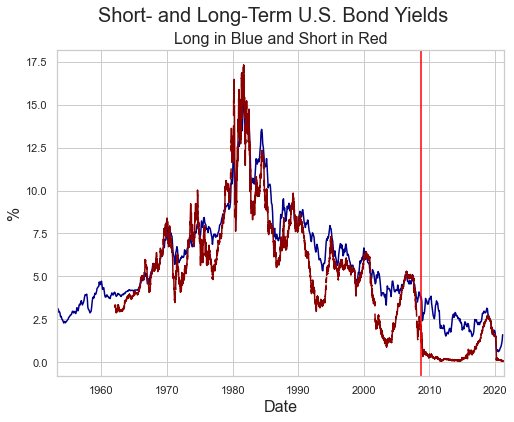

In [31]:
ten_year.plot(color='darkblue', figsize=(8, 6))
one_year.plot(color='darkred')
plt.suptitle('Short- and Long-Term U.S. Bond Yields', fontsize=20)
plt.title('Long in Blue and Short in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

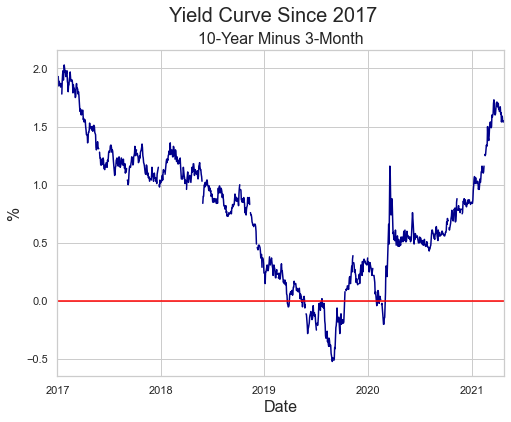

In [32]:
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve Since 2017', fontsize=20)
plt.title('10-Year Minus 3-Month', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="red")

In [33]:
def_as_share = fred.get_series("FYFSGDA188S", observation_start='1950-01-01')

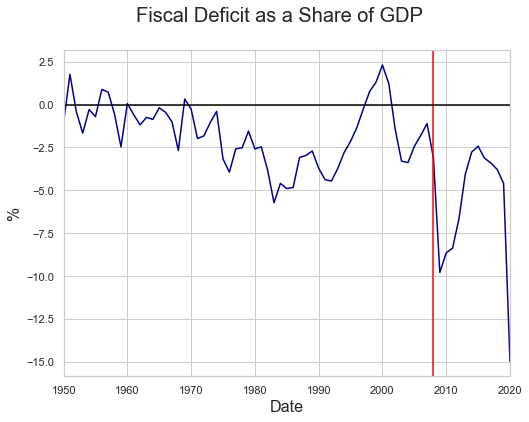

In [34]:
def_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Fiscal Deficit as a Share of GDP', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axhline(0.0, color="black")

In [35]:
debt_as_share = fred.get_series("GFDEGDQ188S", observation_start='1950-01-01')

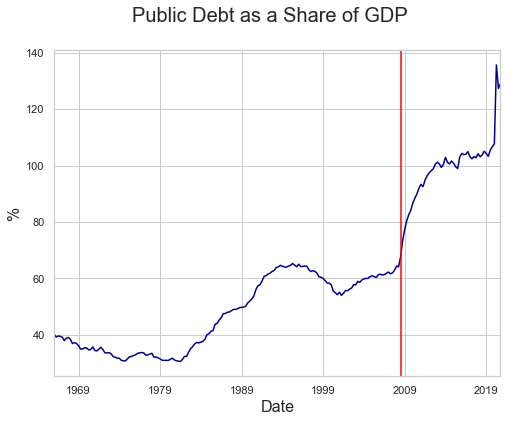

In [36]:
debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Public Debt as a Share of GDP', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

In [37]:
debt_as_share = fred.get_series("DDDM03USA156NWDB", observation_start='1950-01-01')

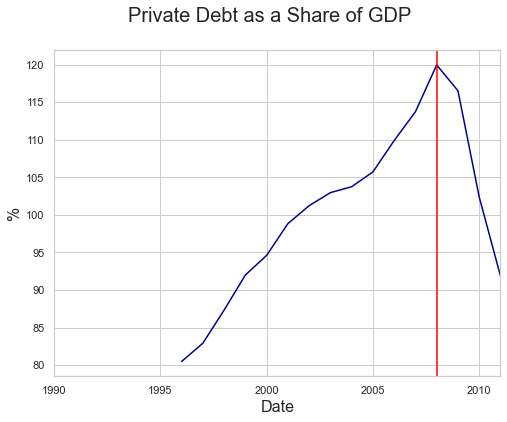

In [38]:
debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Private Debt as a Share of GDP', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

In [39]:
debt_as_share = fred.get_series("BOGZ1FG154104005Q", observation_start='1950-01-01')

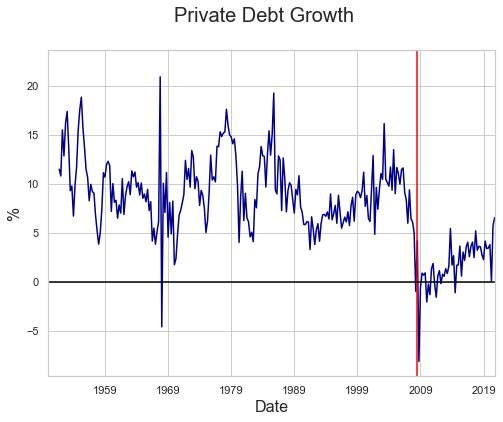

In [40]:
debt_as_share.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Private Debt Growth', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axhline(0.0, color="black")

### Notes on Yield Curves
1. When expectations of economic growth are positive, long-term yields should exceed short-term yields.  **As a result, yield curves should be positive.**  When short rates exceed long rates, the yield curve is said to be *inverted*.
    * **Expectations Theory**: Long rates are the sum of **expected** short term rates.
    * **Liquidity Preference Theory**: Investors demand higher yields (returns) for bonds with long-dated maturities.
    


2. At a point in time, the difference between long- and short-term rates is a measure of the yield curve.



3. During high periods of inflation, such as the late 1970's and the early 1980's, the yield curve is flat, consistent with the Expectations Theory of yield curves: namely, that periods of high inflation will be followed by tight monetary policy that depresses growth.



4. During post-financial crisis periods, such the Great Depression and the GFC, yield curves are steeply sloped, consistent with Liquidity Preference Theory.

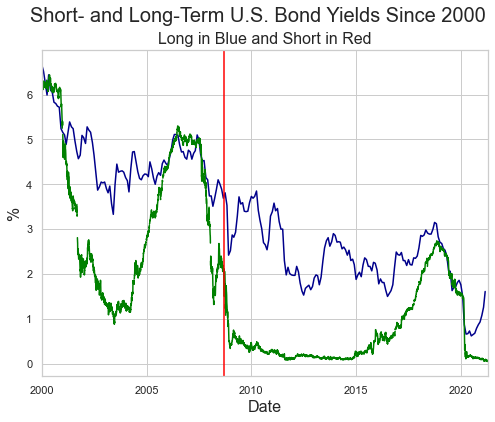

In [41]:
ten_year = fred.get_series("GS10", observation_start='2000-01-01')
one_year = fred.get_series("DGS1", observation_start='2000-01-01')

ten_year.plot(color='darkblue', figsize=(8, 6))
one_year.plot(color='green')
plt.suptitle('Short- and Long-Term U.S. Bond Yields Since 2000', fontsize=20)
plt.title('Long in Blue and Short in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

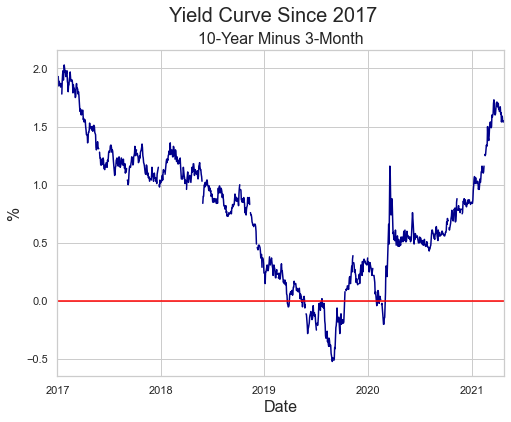

In [42]:
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Yield Curve Since 2017', fontsize=20)
plt.title('10-Year Minus 3-Month', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="red")

### Calculations in This Chapter

* $179084770 = 100000000 \cdot 1.06^{10}$


* $94500000 = 90000000 \cdot 1.05$


* $91037616 = \dfrac{179084770}{1.07^{10}}$


* $89150943 = \dfrac{94500000}{1.06}$

# Mid-Term Review

## Broad topics: Economics and finance
* CRE as an asset class.



* The many markets of CRE.



* The return-risk trade-off.



* Discounting the future.



* Modern Portfolio Theory (MPT).



* The lease as an economic as well as legal document.



* The current macroeconomic cycle.

# Chapter 20: Commercial Mortgage-Backed Securities (CMBS)

* Commercial mortgage-backed securities (CMBS) are bonds backed by pools of commercial mortgages. 



* CMBS securities provide claims to components of the cash flows from the underlying mortgages, as the borrowers pay their interest and principal obligations.



* The different classes of securities are known as tranches. 



* Each tranche is characterized by its priority of claim on the mortgage cash flows and/or by the type of cash flows it has claim to.



* The basic concept behind CMBS is the reallocation of risk as well as the timing of cash flows and debt maturity.



* Basic function of finance: risk transference over a time horizon.

## CMBS Issuance
* Peaked in 2007 at 230 billion



* 2018 volume: ~ 77 billion



* $21 / 7 = 3$

In [43]:
rca = pd.read_excel("RCA.xls", index_col='Date') / 400000000

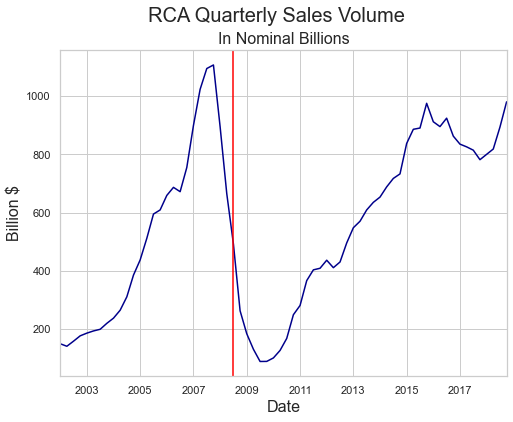

In [44]:
rca["Volume"].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('RCA Quarterly Sales Volume', fontsize=20)
plt.title('In Nominal Billions', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Billion $', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

## Example of Tranching
* See slides

In [45]:
spreads = fred.get_series("AAA10Y", observation_start='1996-01-01')

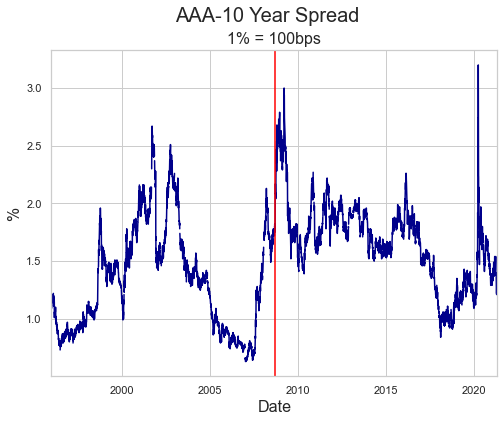

In [46]:
spreads.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('AAA-10 Year Spread', fontsize=20)
plt.title('1% = 100bps', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

In [47]:
ted = fred.get_series("TEDRATE", observation_start='1996-01-01')

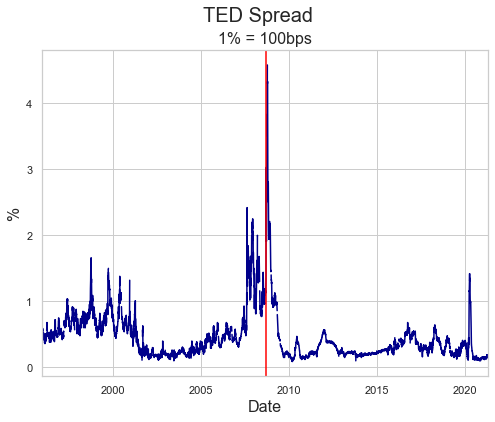

In [48]:
ted.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('TED Spread', fontsize=20)
plt.title('1% = 100bps', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

# Chapter 14: After-Tax Investment Analysis and Corporate Real Estate

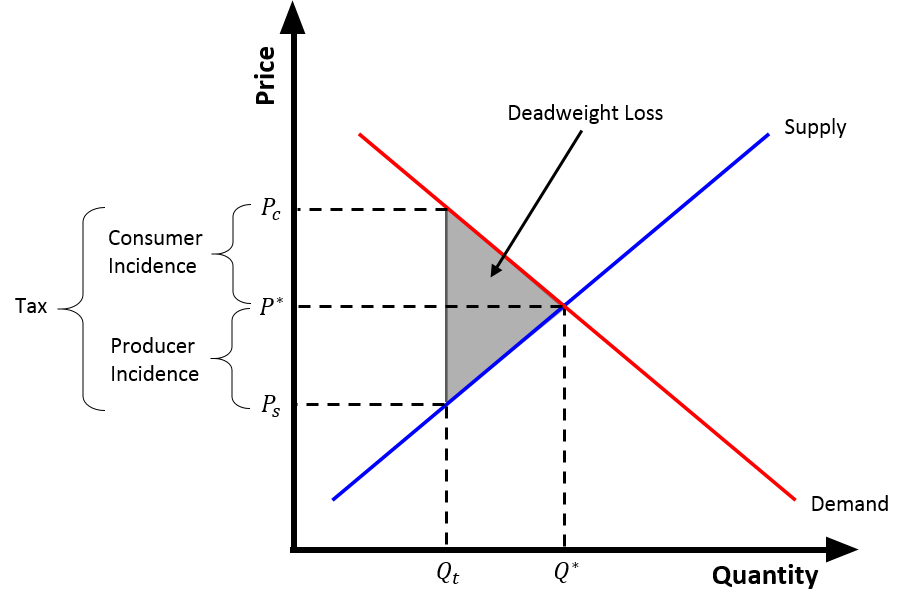

In [49]:
url = 'https://upload.wikimedia.org/wikipedia/commons/6/67/Detailed_tax_wedge.png'
Image(url, width=600, height=600)

* Basic rule of thumb: **Taxes deferred are taxes never paid**.



* Most recent law of relevance: Tax Cuts and Jobs Act (TCJA) of 2017.
    * Lower corporate tax rates.
    * Allowed for immediate expensing of **new capital**.
    * Created **Opportunity Zones** to encourage development through tax deferment.

# Chapter 23: The Real Estate Investment Trust (REIT)

## Overview
* REITs are corporations that are exempt from taxation at the corporate level.  



* This special tax status has costs in terms of restrictions on the operating and financial strucutre and dividend payout requirements.  



* There are several distinctions of a REIT from a fiannce and economics perspective.  



* When compared to private direct investment (DI), the REIT is generally a collection of assets, as opposed to a single asset.  



* As a result, there are different incentives that managers face when compared with the management of a single asset.  


* In contrast to the single asset entity, equity capital through public markets flow to REITs providing liquidity to otherwise illiquid markets.  
    * Real-time pricing may provide a form of discipline (or that was the general assessment pre-GFC).



* REITs are stocks with the potential of being infinitely lived.
    * As a result, the capitalized value on a public market (market capitalization) may not reflect the intrinsic value of the real estate that comprises a REIT portfolio.  
    * Short-term macroeconomic fluctuations may lead to deviations in REIT market value (NAVs) and real-estate instrinsic value.  
    * We will consider the distinction between REITs and direct investment.
    * There is the marketplace's assessment: total REIT investment is only a third of its value just prior to the GFC.
    * Higher returns in owning and actively managing a property.  Think Warren Buffett or Ben Graham on value investing.

## Legal Structure
* Entity must file an election form with their tax return selecting REIT status.
    * Entity must have more than at least 100 shareholders during a calendar year.
    * Ownership cannot be concentrated.
    * At least 75% of assets must consist of physical real estate.
    * At least 95% of gross income must be derived from dividends, rents or gains from sale
    * At least 75% of gross income must be derived from mortgages, interest on mortgages, or gains from sale
    * No more than 30% of the REITs income can be derived from sale of securities held less than six months or real property held less than four years.



* The effort to bring in liquidity require the imposition of illiquidity.

## Distribution Requirements
* At least 95% of REIT taxable income myst be distributed to shareholders as a dividend.  


* Example
    * Net Operating Income (NOI) is 100
    * Interest is 30
    * Depreciation is 30
    * 100 - 30 - 30 = 40, which is net income
    * 95% * 40 = 38, the dividend
    * Suppose cash flows were 70
    * Payout Ratio is 38/70 = 54%



* If more cash is distrubted than net taxable income, the difference is treated as a non-taxable return of capital.
    * This reduces a shareholder's basis in the investment, which mens that this excess return will be taxed as a capital gain (either at the time of the sale of the stock or when the basis reaches zero).  
    * Note that this rule raises certain incentive issues regarding the strategic redistribution of cash (*e.g.* umbrella partnership REIT or UPREIT).

## Type Is Based on Claimholder Position on the Owned Asset
* **Equity**: Asset is an equity position on the real estate.  Debt may be used to help finance equity ownership.  Equity REITs are the most prevalent, due to repositioning brought on overbuilt markets, a dearth of private debt and equity capital, and big differences in the cost of equity capital.



* **Mortgage**: Asset is ownership of mortgages.  Debt may be used to help finance equity ownership of a debt position.  Some of the most profitable REITs have been mortgage REITS.



* **Hybrid**: A mix of equity and debt.

## Leverage
* Most REITs employ leverage in the range of 30 to 40% of total assets.  




## Market Focus
* The market has preferred REITs that were *sharp shooters*
    * REITs that have a geographical and property focus.  This has been affected by the technological changes that are currently affecting the market.




## Dividend Payout Policies
* Mixed, where the free cash flow theory is relevant.  
    * Initially, shareholders preferred a high rate of payout of newly-minuted REITs.  
    * Recently, if management has developed a reputable financial and acquisition track record, the market may prefer a more conservative payout schedule.

## Accounting Conventions and Key Financial Ratios
* **GAAP Net Income**: EBITDA (NOI) less interest less amortization of capitalized expenditures less depreciation plus/less certain gains/losses from non-reoccurring transactions.



* **Funds from Operations (FFO)**: GAAP Net Income excluding gain/losses from non-reoccurring transactions, plus depreciation plus amortization of capitalized expenditure
    * Potential criticisms
        1. Real estate improvements depreciate, while land typically appreciates.
        2. Capitalized expenses often re-occur.
        3. Income smoothing is allowed by GAAP.
        4. Adjustable rate debt mistates true interest liability.



* **Net Asset Value (NAV)**: An attempt to calculate current real estate/other asset values not including of franchise value.



* **Market Value to Book Value Ratio**: The ratio of the total market value of the firm's assets to its NAV.  If greater than one, there are external growth expectations being built into the stock price.



* **FFO Multiple**: The ratio of stock price per share to FFO per share.  A higher multiple indicates a lower cost of equity capital and hence higher future growth expectations.



* **FFO Yield**: The ratio of FFO per share to stock price per share.  Inverse of FFO Multiple.  Some people incorrectly compare this to a cap rate on a single property.



* **Dividend Yield**: The ratio of dividend paid per share to price per share.  This ratio is usually less than the FFO yield.



* **Payout Ratio**: The ratio of dividend per share to FFO per share.

## Some Consideration of REIT Management Strategy

### REITs in the "Land of Growth"
* Capital markets often reward companies that can increase their share price.  See [Michael Jensen](https://hbswk.hbs.edu/item/value-maximization-and-stakeholder-theory).



* Growth stocks appear "more expensive" than value (or income) stocks.



* Consider real estate in the context of income and growth.  
    * It is often thought that real estate is focused on income (rents) rather than growth (price appreciate). 
    * Recall, however, that cap rates have been falling, leading to implicit price appreciation.

* **Financial Strategy**
    * 90% distribution requirement may put REITs under additional financial stress.
    * The use of leverage, however, may give rise to opportunities that are otherwise not available to other firms to convert income-oriented, low-growth stabilized properties into higher growth, though lower yield equities.



* **Specialization**
    * REITs can focus on specific asset classes, such as industrial, that have performed well.
    * They can also focus on distressed assets, such as retail malls, with the aim of improving management or conversion.



* **Vertical Integration**
    * Economic benefits of eliminating the "middle man".  
    * Elimination of double marginalization throughout the real estate value chain.



* **Economies of Scale**: Is Bigger Better?
    * Scale economy refers to the concept that average costs per unit decline with the number of units produced, resulting in benefits to large scale production.
    * Very unclear whether this is true for a REIT if one is focused solely on returns.  Smaller and more focused REITs may be able to generate larger returns than larger and more diversified REITs.  This may be due to a "skill specialization".  



* **Branding**
    * Simon for retail.  Boston Properties for office.  Prologis for industrial.



* **Market Power**
    * Consider the idea that a space market is an [antitrust market](https://www.project-disco.org/competition/090518-antitrust-in-60-seconds-market-definition/).
    * Large REITs may be able to exercise a type of market power in localized space markets.  
    * Given access to debt markets, such market power could give them leverage in negotiation on the terms of acquisitions or dispositions.

### Exhibit 23-8
* Measures correlatons in percentages between REIT returns and three alternatives: the S&P, small cap growth stocks and small cap value stocks.  
    * The returns are measured on a 60-month rolling average to smooth.
    * REIT returns are ~70% correlated with smal cap value stocks.
    * REIT returns are less correlated with small cap growth stocks and a broad market, such as the S&P.
    * Correlations rose substantially during the financial crisis because returns (which can be negative) became highly correlated during this time period for almost all asset classes.

# Classes 10 and 11: Technological disruption and the changing landscape for real estate

## What Use Is Economics and Finance to Real Estate?
* Economics and finance study behavior of firms and individuals making choices faced with the uncertainty of the future.



* Demand and supply curves are abstractions that allow us to reason logically about market behavior.  
    * I’ve never seen a demand curve, just as a physicist has not seen an electron.
    * Start with a market in equilibrium: demand = supply that yields equilibrium price and quantity.  (What we actually see.)
    * “Shock” the equilibrium with some “exogenous” change and walk through the logic of the implications: “comparative dynamics”.



* Key assumption: **individuals and investors are risk averse**.  
    * Prefer 50 quatloos with certainty to a coin flip with same expected outcoume: 100 if heads and 0 if tails.



* This idea prevails in our discussion
    * **We could always guess, but we don't**.

## Recall these basic empirical regularities

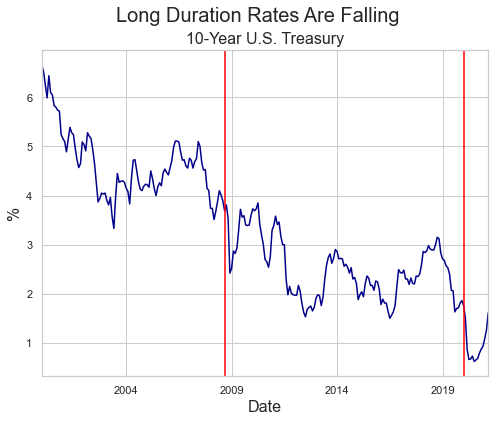

In [50]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Are Falling', fontsize=20)
plt.title('10-Year U.S. Treasury', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")
plt.axvline(dt.datetime(2020, 1, 1), color="red")

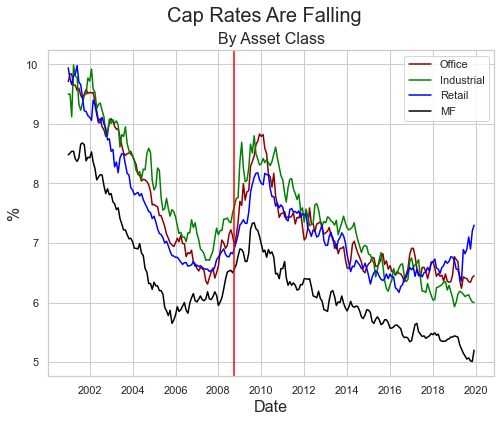

In [51]:
plt.figure(figsize = (8, 6))
plt.suptitle("Cap Rates Are Falling", fontsize=20)
plt.title("By Asset Class", fontsize=16)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 10, 1), color="red")

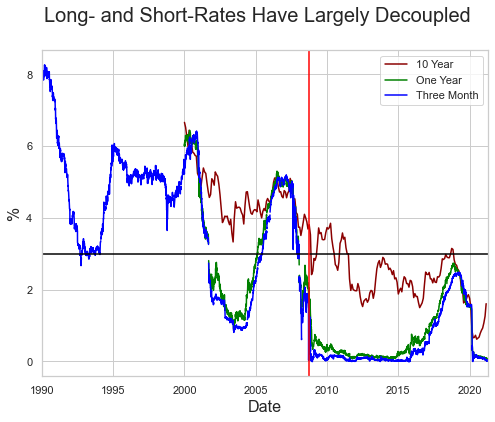

In [52]:
ten_year.plot(c='darkred', label='10 Year', figsize=(8, 6), )
one_year.plot(c='green', label='One Year')
three_month.plot(color='blue', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(3.0, color="black")
plt.axvline(dt.datetime(2008, 9, 15), color="red")

## Why?
* DiPisquale and Wheaton is **not causal but observational**.
    * They developed a model with predictions consistent with observation.
        * Fall in cap rates consistent with investor demand for real estate.
        * Not how this is done.
    * Torto-Wheaton Research would develop forecast models using the DW approach.    
        * Approach had already fallen out of favor in methodological approaches to time-series modeling.



* Is there something bigger going on?
    * Yes.
    * Capital is global, and long-term rates are declining.
    * Real estate performance is local (and increasingly so).
    * Another way in which real estate is differentiated from other asset classes. 

## But what is the time path going forward?
* Critical question for the industry
    * What **exit cap rate** to use in a DCF?
    * What **rent** to use in a pro forma of future cash flows?
    * Can we predict **future vacancy** to find areas with outsized performance?



* We could always make a guess about the above.



* Or we could use an **algorithm** to predict (or forecast).

## Two Brief Digressions
1. Markov provesses (or chains)
2. Simple forecasting algorithm: AR(1)

In [53]:
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

## Introduction to Markov Processes

* Markov processes are already familiar to anyone with a calendar.
* Everything I need to know about **tomorrow** is contained by my knowledge of **today**.
* Markov processes are a fundamental building block of time series.

In [54]:
print("The Calendar: A Deterministic Markov Transition Matrix")
table = [[" ", "S", "M", "T", "W", "T", "F", "S"],
         ["S", "0", "1", "0", "0", "0", "0", "0",],
         ["M", "0", "0", "1", "0", "0", "0", "0",],
         ["T", "0", "0", "0", "1", "0", "0", "0",],
         ["W", "0", "0", "0", "0", "1", "0", "0",],
         ["T", "0", "0", "0", "0", "0", "1", "0",],
         ["F", "0", "0", "0", "0", "0", "0", "1",],
         ["S", "1", "0", "0", "0", "0", "0", "0",],]
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print()

The Calendar: A Deterministic Markov Transition Matrix
╒═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╕
│   │ S │ M │ T │ W │ T │ F │ S │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ S │ 0 │ 1 │ 0 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ M │ 0 │ 0 │ 1 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ T │ 0 │ 0 │ 0 │ 1 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ W │ 0 │ 0 │ 0 │ 0 │ 1 │ 0 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ T │ 0 │ 0 │ 0 │ 0 │ 0 │ 1 │ 0 │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ F │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │ 1 │
├───┼───┼───┼───┼───┼───┼───┼───┤
│ S │ 1 │ 0 │ 0 │ 0 │ 0 │ 0 │ 0 │
╘═══╧═══╧═══╧═══╧═══╧═══╧═══╧═══╛



In [55]:
print("Day of Week Vector: Today is Monday")
table = [["S", "M", "T", "W", "T", "F", "S"],
         ["0", "1", "0", "0", "0", "0", "0",]]
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print()

Day of Week Vector: Today is Monday
╒═══╤═══╤═══╤═══╤═══╤═══╤═══╕
│ S │ M │ T │ W │ T │ F │ S │
├───┼───┼───┼───┼───┼───┼───┤
│ 0 │ 1 │ 0 │ 0 │ 0 │ 0 │ 0 │
╘═══╧═══╧═══╧═══╧═══╧═══╧═══╛



### How do we iterate the day of the week?  
* Today is Monday.  This is called the state of the system.



* What is tomorrow?  We want to iterate the system through time.



* day of week vector * Markov transition matrix = ?

In [56]:
# Let's find out.

MT = np.matrix('0 1 0 0 0 0 0; 0 0 1 0 0 0 0; 0 0 0 1 0 0 0; 0 0 0 0 1 0 0; 0 0 0 0 0 1 0; 0 0 0 0 0 0 1; 1 0 0 0 0 0 0')
dow = np.matrix('0 1 0 0 0 0 0')

print("Markov Transition Matrix")
print(MT)
print()
print("Today")
print(dow)
print()
print("Tomorrow")
print (dow * MT)
print()
print("The Day After Tomorrow")
print (dow * MT * MT)
print()
print("The Day After Tomorrow Using Linear Algebra")
print (dow * np.linalg.matrix_power(MT, 2))

Markov Transition Matrix
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0]]

Today
[[0 1 0 0 0 0 0]]

Tomorrow
[[0 0 1 0 0 0 0]]

The Day After Tomorrow
[[0 0 0 1 0 0 0]]

The Day After Tomorrow Using Linear Algebra
[[0 0 0 1 0 0 0]]


### Why are these useful in finance?
* Burton Malkiel's *A Random Walk Down Wall Street*.



* Set an arbitrary starting point and iterate the system using a simple Markov process.



* Each second, this Markov process can move up 1 or it can move down, which it does at random.



* Pr(up) = Pr(down) = 0.5.

Text(0.5, 0, 'Seconds')

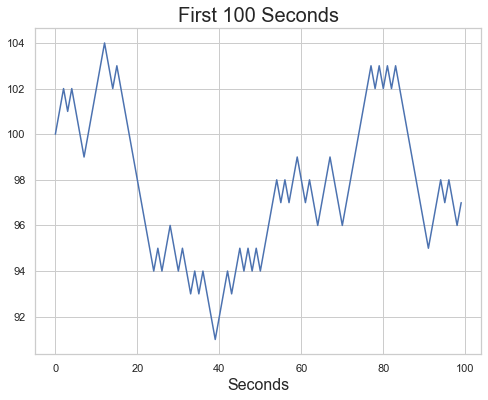

In [57]:
random.seed(1234)

pos = 100  
walk = [pos] 
nsteps = 10000 
for i in range(nsteps):
    step = 1 if np.random.randint(0, 2) else -1
    pos += step
    walk.append(pos)

plt.figure(figsize=(8, 6))
plt.plot(walk[0:100])
plt.title('First 100 Seconds', fontsize=20)
plt.xlabel('Seconds', fontsize=16)

Text(0.5, 0, 'Seconds')

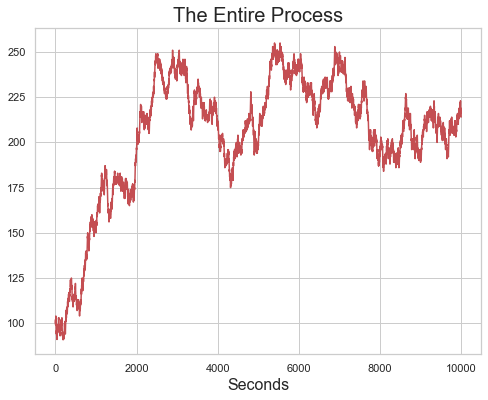

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(walk, 'r')
plt.title("The Entire Process", fontsize=20)
plt.xlabel('Seconds', fontsize=16)

### What does this look like?

Text(0, 0.5, '$')

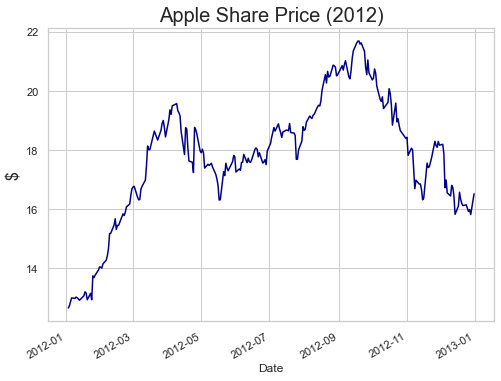

In [59]:
start, end = "2012-01-01", "2013-01-01"
aapl = web.get_data_yahoo('aapl', start=start, end=end)['Adj Close']
aapl.plot(color = 'darkblue', figsize=(8, 6))
plt.title('Apple Share Price (2012)', fontsize=20)
plt.ylabel('$', fontsize=16)

### AR(1) processes
* We can write the AR(1) process as follows: $y_t = \rho y_{t-1} + \epsilon_t$ for $|\rho|<1$.  
    * This process would model the rule that, "Today is mostly yesterday plus a little noise."  
    * Let $\rho$ denote the extent to which yesterday affects today, assuming a diminishing effect or $|\rho|<1$.
    * Often, we refer to the $\epsilon$'s as "innovations".  



* Therefore, today's realization, $y_t$, is primarily yesterday's realization, $\rho y_{t-1}$, plus today's innovation, $\epsilon_t$.



* Let's build an AR(1) process from the bottom up.
    * $y_1 = \epsilon_1$: Take a single draw from $N(0,1)$ to begin the process.
    * $y_2 = \rho y_1 + \epsilon_2$: Take another single draw and continue to build the process.
    * $y_3 = \rho y_2 + \epsilon_3$



* And so on,
    * $y_T = \rho y_{T-1} + \epsilon_T$



* Or generally,
    * $y_t = \rho y_{t-1} + \epsilon_t$ for $|\rho|<1$

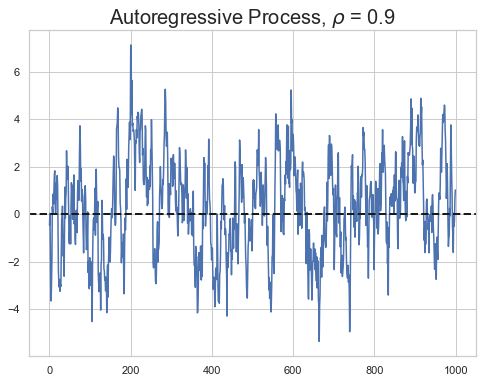

In [60]:
np.random.seed(2233)
T = 1000
rho = 0.9
y = np.zeros(T)

y[0] = np.random.normal(0, 1)

for t in range(1, T):
    y[t] = rho * y[t-1] + np.random.normal(0, 1)
    
r = rho
plt.figure(figsize = (8, 6))
plt.plot(y, 'b')
plt.title(r'Autoregressive Process, $\rho$ = %r' %(r), fontsize=20)
plt.axhline(0, color='k', ls='--', lw=2)

## Forecasting: complicated or agnostic
* **Complicated**: Fed's Dynamic Stochastic General Equilibrium (DSGE) model.
    * Single representative agent trading with herself through time, chosing how much to work and consume.
    * Producers have some market power to set prevailing wages and output prices.  
    * "Banks" are financial intermediaries matching supply and demand for investment.
    * Government has both fiscal and monetary policy tools.
    * Stocks to all linkages are AR(1) with **productivity shocks** as the most relevant.
    * Solution is mathematically complicated, but it can be used to forecast.



* **Agnostic**: Savage's approach to cap rate modeling and forecasting of rent and vacancy for NAIOP.

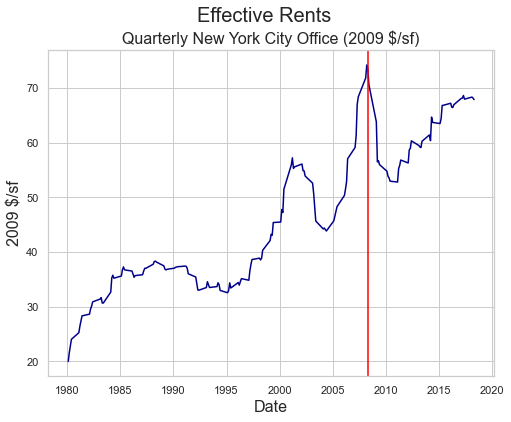

In [61]:
caprates = pd.read_csv('nyc.csv', index_col='Time')

plt.figure(figsize = (8, 6))
plt.suptitle("Effective Rents", fontsize=20)
plt.title("Quarterly New York City Office (2009 $/sf)", fontsize=16)
plt.plot(caprates['TW Rent Index ($/sf)'], color='darkblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('2009 $/sf', fontsize=16)
plt.axvline(2008.3, color="red")

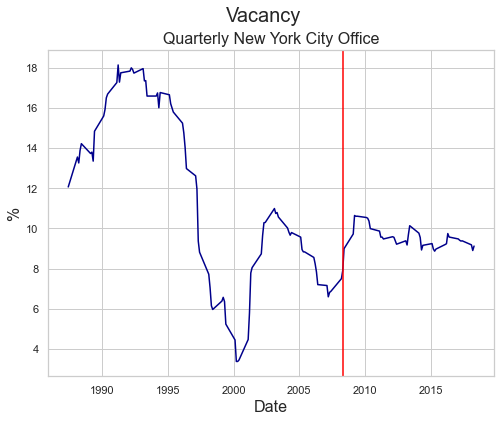

In [62]:
plt.figure(figsize = (8, 6))
plt.suptitle("Vacancy", fontsize=20)
plt.title("Quarterly New York City Office", fontsize=16)
plt.plot(caprates['Vacancy Rate (%)'], color='darkblue')
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(2008.3, color="red")

1. *FRBNY*: DSGE Forecasts, March 2021 
2. *Savage*, NAIOP Office and Industrial Demand Forecasts
3. *Urban Land Institute* Demand Forecasts
4. *Ren and Savage*, Where do cap rates go from here? A new approach, September 2018
5. *Savage*, The Golden Age of Empiricism, March 7, 2017 
6. *Savage*, Programming with Big Data, December 7, 2017 
7. *Savage*, Potential Impacts of Technological Change, PREA Presentation, Austin, May 2018
8. *Savage*, Disruption from Automation, September 2016
9. *Zhao, Savage, and Vo*, Economics Meets Big Data Reality: Can the Rubber Hit the Road?

## Themes to Date
1. Economics and finance drive the math.
2. Economics and finance allow us to think logically about how markets might perform.  (Excel is just a tool that is increasingly being replaced by more sophisticated enterprise platforms.)
3. We discount the future because it may not occur.
4. We recognize that there is a trade-off between *ex ante* returns and risk.  *Ex post* we may still lose money on an investment.
5. Capital markets are global, while real estate is local.  Real estate assets are highly heterogeneous and illiquid.  Debt and leverage play a critical role in the industry.
6. Real estate investments provide investors a yield (cash flows) and potential growth (price appreciation).
7. Real estate markets have complex contracts that we call leases that govern the responsibilities of all parties.  These contracts reflect economic incentives of the parties involved.

## Some Empirical Regularities

In [63]:
ten_year = fred.get_series("GS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

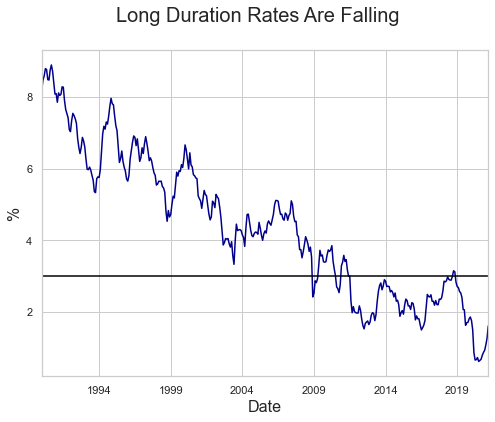

In [64]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Are Falling', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(3.0, color="black")

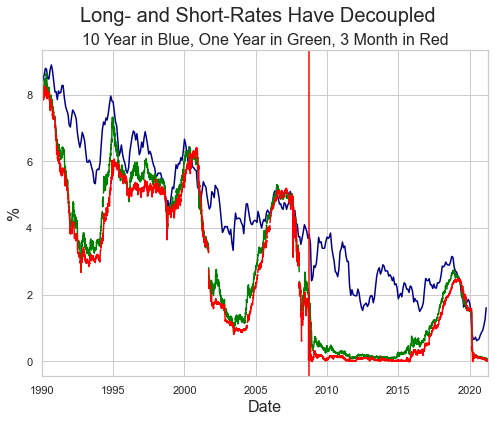

In [65]:
ten_year.plot(color='darkblue', figsize=(8, 6))
one_year.plot(color='green')
three_month.plot(color='red')
plt.suptitle('Long- and Short-Rates Have Decoupled', fontsize=20)
plt.title('10 Year in Blue, One Year in Green, 3 Month in Red', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

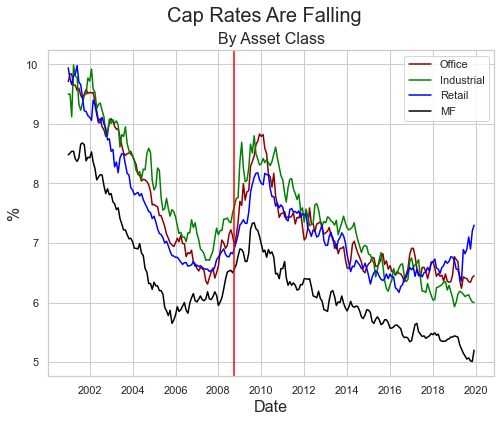

In [66]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

plt.figure(figsize = (8, 6))
plt.suptitle("Cap Rates Are Falling", fontsize=20)
plt.title("By Asset Class", fontsize=16)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 10, 1), color="red")